#### Welcome to Week 4!

We will be focussing in Particle Physics Analysis and detecting matter/antimatter assymetries in the production of certain types of particles. 

![LHCb detector](https://www1b.physik.rwth-aachen.de/~schael/LHCb_files/LHCB%20PREVIEW-white-bg.jpg)

The data we are using comes from LHCb - one of the experiments at LHC. It is a highly specialised detector aimed at detecting decays involving the B-quark. Unlike the other major experiments, LHCb detects particles very close to the source and looks almost exclusively in the forward direction - this gives the detector many advantages compared to other experiments at LHC.

In order to get started, we need to access a file which was made using the standard [ROOT framework](https://root.cern.ch/) and download some datafiles into this machine. We also need some tools to access and manipulate this file:-

- [ ] UpRoot (https://uproot.readthedocs.io/en/latest/)
- [ ] Awkward (https://pypi.org/project/awkward/)
- [ ] wget (https://pypi.org/project/wget/)
- [ ] matplotlib for plotting!
- [ ] Scipy for fitting (https://scipy.org/)

In [ ]:
#run this once and update for future packages you may use
#putting in comment because i already ran it
#%pip install uproot awkward wget matplotlib scipy
# This will also install other packages needed (xxhash, numpy, etc.) - handy.

In [3]:
# Notice, we got a warning that these files were installed in a weird location (since packages is not writable)
# Let's fix it! We just add the directory it installed them to, to the place Python looks for packages. Simples.
!PATH=/home/jovyan/.local/bin$PATH
!echo $PATH

$PATH


In [4]:
import awkward,uproot

All being well - this should give no errors.... do not try to proceed if you get errors in the above cell.

The next step is to get our data file - you can find it on Canvas here: https://canvas.maastrichtuniversity.nl/courses/21975/files/4933459/download?download_frd=1

Then upload it directly. You can also run the following:

In [5]:
import wget
#url='http://opendata.cern.ch/record/4900/files/B2HHH_MagnetDown.root'
#download=wget.download(url)
#!mkdir LHCb_Data && mv B2HHH_MagnetDown.root ./LHCb_Data/B2HHH_MagnetDown.root
# If we ALL do this too often, CERN will block our IP address....

In [6]:
#Since we need to use Uproot to load our file and awkward to handle it, we must first import this into Python:
#We already did this above, it does not hurt to do it again, and if you make a new notebook in future remember this step
import uproot, awkward, numpy as np
#Then we open the ROOT file using the open command. - note you need to make this file path correct for your own setup!
f = uproot.open ("LHCb_Data/B2HHH_MagnetDown.root")
#From our file, we have to extract the DecayTree
f.keys()

['DecayTree;1']

In [7]:
#It tells us there is one key, it's called DecayTree. Let's look inside:
f["DecayTree"].show()
#You can also use keys() again to see them all...
f["DecayTree"].keys()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
B_FlightDistance     | double                   | AsDtype('>f8')
B_VertexChi2         | double                   | AsDtype('>f8')
H1_PX                | double                   | AsDtype('>f8')
H1_PY                | double                   | AsDtype('>f8')
H1_PZ                | double                   | AsDtype('>f8')
H1_ProbK             | double                   | AsDtype('>f8')
H1_ProbPi            | double                   | AsDtype('>f8')
H1_Charge            | int32_t                  | AsDtype('>i4')
H1_IPChi2            | double                   | AsDtype('>f8')
H1_isMuon            | int32_t                  | AsDtype('>i4')
H2_PX                | double                   | AsDtype('>f8')
H2_PY                | double                   | AsDtype('>f8')
H2_PZ                | double                   | AsDtype(

['B_FlightDistance',
 'B_VertexChi2',
 'H1_PX',
 'H1_PY',
 'H1_PZ',
 'H1_ProbK',
 'H1_ProbPi',
 'H1_Charge',
 'H1_IPChi2',
 'H1_isMuon',
 'H2_PX',
 'H2_PY',
 'H2_PZ',
 'H2_ProbK',
 'H2_ProbPi',
 'H2_Charge',
 'H2_IPChi2',
 'H2_isMuon',
 'H3_PX',
 'H3_PY',
 'H3_PZ',
 'H3_ProbK',
 'H3_ProbPi',
 'H3_Charge',
 'H3_IPChi2',
 'H3_isMuon']

In [8]:
#Now it shows us all the variables inside, their type and so on
#Let's load one (The x-momentum of Hadron 1) 'H1_PX' variable in an awkward array:
data=f["DecayTree/H1_PX"].array()

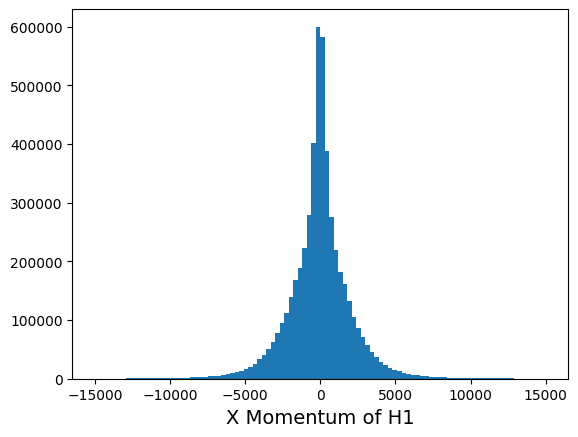

In [9]:
#lets plot something!
import matplotlib.pylab as plt
# make a place to plot something
plt.figure();
plt.hist (data, bins=100, range=(-15000,15000));
plt.xlabel('X Momentum of H1', fontsize=14);


<font color="red"> <ins> If you got here before Chris did the general introduction - please *STOP* take a coffee and then let's go ahead when everyone is together and back in the room </ins> </font>

# Why are we here?

This week is about finding out something about one of the fundemental questions in physics. Why do we have "stuff".

According to many of our models, and according to many measurements in particle physics, matter and anti-matter appear to be produced in equal quantities.

However, when one looks at the Universe in general, we have more matter than anti-matter left - so there need to be some processes where anti-matter and matter are not produced equally. You can find out more about the Matter/Anti-Matter Asymmetry [here](http://press.web.cern.ch/backgrounders/matterantimatter-asymmetry)

One place we look for this asymetry is in [charge-partity (CP) violation](https://www.symmetrymagazine.org/article/october-2005/explain-it-in-60-seconds) in particle physics processes. This essentially says that the processes that happen in the anti-particle version of a decay do not **exactly** match to the processes that happen in the particle version of the decay.



---



At LHCb, we produce many things. In this analysis we are interested in events that take place when we have either particle of the  B<sup>+</sup> meson and it's antiparticle the B<sup>-</sup> meson.

We cannot detect these mesons directly. They decay into other things before we have a chance to measure them properly. So we collect data on the decay products, often called daughter particles. There are ~524~ 630 [documented](https://pdg.lbl.gov/2022/listings/rpp2022-list-B-plus-minus.pdf) ways that the B<sup>+/-</sup> decays into various combinations. In order to simplify the process, we choose decay combinations that are convenient or have particular properties.

In this analysis, we will take the process:-

B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>


To do so, we are given the following data for each event in our system:-

![alt text](https://raw.githubusercontent.com/lhcb/opendata-project/80d64a3796e593fc8f9b257e85f32ae2e54f131f/Images/Variables.png)

Here, H1 is the detected daughter particle (so a Kaon, Muon or a Pion), **not** the B-meson - the mother particle. Normally we would have to do some reconstruction from the decay products (the Daughters) to the Mother to be able to make some conclusions. As we know there is a H2 and H3 referring to the 2nd and 3rd daughters in this decay.

Let's get started with working with this data:

For our analysis, the momentum of each of the daughter particles is split into the three cartesian components. We have combined these into a variable...perhaps called H1_Ptot?

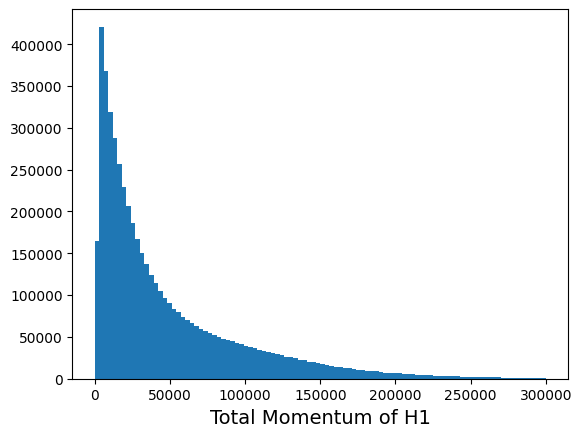

In [10]:
#Here make a plot of the Total momentum of each of the three daughters
#First is to access the data from the Decay tree and either load one array per variable or a large array with each variable as another column
Events=f['DecayTree']
H1_PX=Events['H1_PX'].array()
H1_pY=Events['H1_PY'].array()
H1_PZ=Events['H1_PZ'].array()
H1_ProbK=Events['H1_ProbK'].array()
H1_ProbPi=Events['H1_ProbPi'].array()
H1_charge=Events['H1_Charge'].array()
H1_isMuon=Events['H1_isMuon'].array()
B_flightDistance=Events['B_FlightDistance'].array()
B_VertexChi2=Events['B_VertexChi2'].array()
H1_IPChi2=Events['H1_IPChi2'].array()
H1_Ptot=np.sqrt(H1_PX**2+H1_pY**2+H1_PZ**2)
# once the data is extracted you will need to do some mathematics to calculate total momentum from the three components


# then here you can plot something (remember to adjust the range)
plt.figure();
plt.hist (H1_Ptot, bins=100, range=(0,300000));
plt.xlabel('Total Momentum of H1', fontsize=14);


In the end we do not really care about the kinetics of the daughters, our main interest is in the B-Meson. So we make the assumption that these three particles come from the same Mother, we can calculate what momentum she must have had (since momentum is conserved). So we now want to calculate and then plot the total momentum for the mother (M_Ptot).

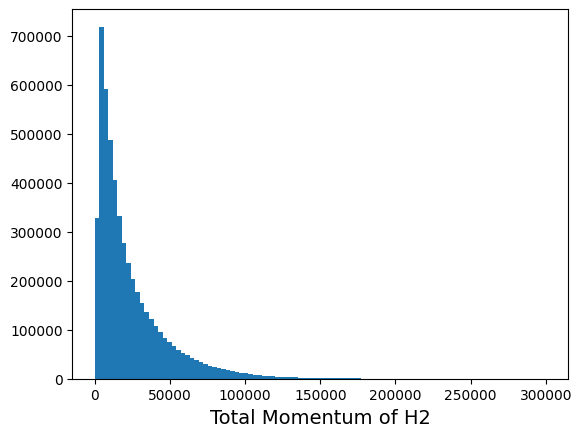

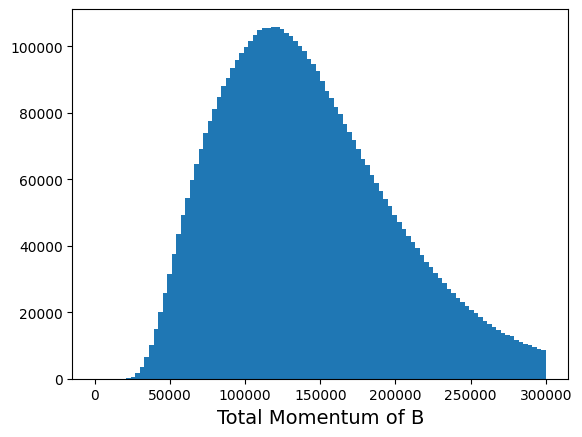

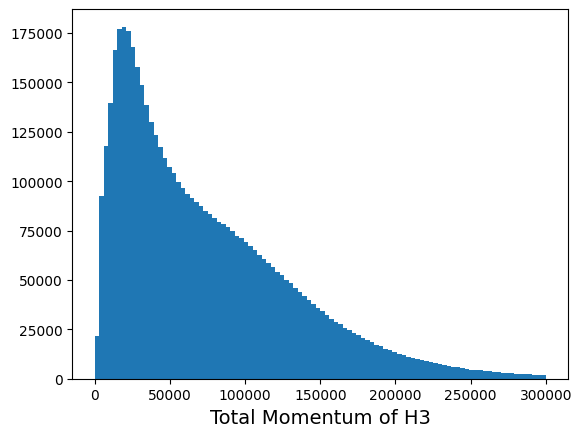

In [11]:
#Next we need to repeat these things in order to plot the momentum of the mother
#Again, think about how we calculate the momentum of a mother particle in this case...
H2_PX=Events['H2_PX'].array()
H2_pY=Events['H2_PY'].array()
H2_PZ=Events['H2_PZ'].array()
H2_ProbK=Events['H2_ProbK'].array()
H2_ProbPi=Events['H2_ProbPi'].array()
H2_charge=Events['H2_Charge'].array()
H3_PX=Events['H3_PX'].array()
H3_pY=Events['H3_PY'].array()
H3_PZ=Events['H3_PZ'].array()
H3_ProbK=Events['H3_ProbK'].array()
H3_ProbPi=Events['H3_ProbPi'].array()
H3_charge=Events['H3_Charge'].array()
H2_Ptot=np.sqrt(H2_PX**2+H2_pY**2+H2_PZ**2)
H3_Ptot=np.sqrt(H3_PX**2+H3_pY**2+H3_PZ**2)


PX = H1_PX + H2_PX + H3_PX
pY = H1_pY + H2_pY + H3_pY
PZ = H1_PZ + H2_PZ + H3_PZ

B_Ptot=np.sqrt(PX**2 + pY**2 + PZ**2)

plt.figure();
plt.hist (H2_Ptot, bins=100, range=(0,300000));
plt.xlabel('Total Momentum of H2', fontsize=14);
plt.figure();
plt.hist (B_Ptot, bins=100, range=(0,300000));
plt.xlabel('Total Momentum of B', fontsize=14);
#B_Ptot=...
plt.figure();
plt.hist (H3_Ptot, bins=100, range=(0,300000));
plt.xlabel('Total Momentum of H3', fontsize=14);

So we are cracking along with looking at the kinematics of our decay. What might also be handy is a way to dump our all our data from a given entry in one output:

Let's take a look at the whole data file that is available to us by looking at one specific entry - number 45

In [12]:
# lets load the data in a slightly different way:
# Lets take our decay tree and just make it an array with a header which is the name of the variable
branches = Events.arrays(library="np")
# now we just make some pretty printing and loop over all items in the dictionary relating to one particular entry (e.g. number 45)
entry_number = 45
entry_data = {key: value[entry_number] for key, value in branches.items()}
print("Event number #45")
print("-------------------")
for branch, value in entry_data.items():
    print("%s  :  %s" % (branch, value))

Event number #45
-------------------
B_FlightDistance  :  257.00205776946603
B_VertexChi2  :  1.865567179221614
H1_PX  :  420.3413896413646
H1_PY  :  -110.66276079201207
H1_PZ  :  5883.766388082404
H1_ProbK  :  0.012183159589767456
H1_ProbPi  :  0.8191394209861755
H1_Charge  :  -1
H1_IPChi2  :  27121.53690741779
H1_isMuon  :  1
H2_PX  :  -985.6367588987478
H2_PY  :  630.9893539299605
H2_PZ  :  35342.13861801284
H2_ProbK  :  0.6670113801956177
H2_ProbPi  :  0.04563945531845093
H2_Charge  :  1
H2_IPChi2  :  13712.438218214942
H2_isMuon  :  0
H3_PX  :  -6242.300384410311
H3_PY  :  -862.2130979651508
H3_PZ  :  277275.49225626234
H3_ProbK  :  0.07501816749572754
H3_ProbPi  :  0.428352952003479
H3_Charge  :  1
H3_IPChi2  :  1026.12298434195
H3_isMuon  :  0


Our next task is to the find the Energy of each of the Kaons. We need to do this in a relativistically correct manner - so recalling that E<sup>2</sup>=p<sup>2</sup>+m<sup>2</sup> and by looking up the mass of the Kaon - you can find the Energy for the three Kaons.

[1.75e+05, 4.19e+05, 1.94e+05, 1.22e+05, ..., 5.44e+04, 1.58e+05, 1.42e+05]


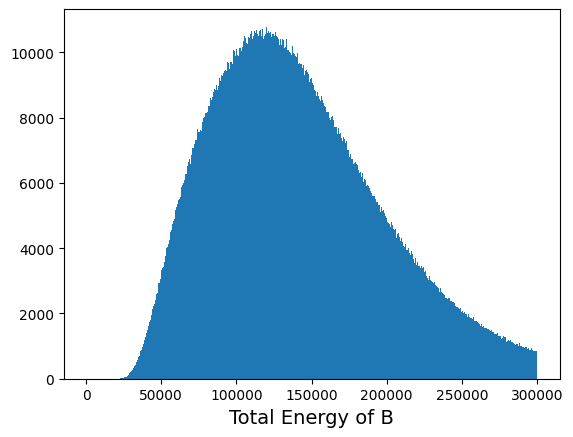

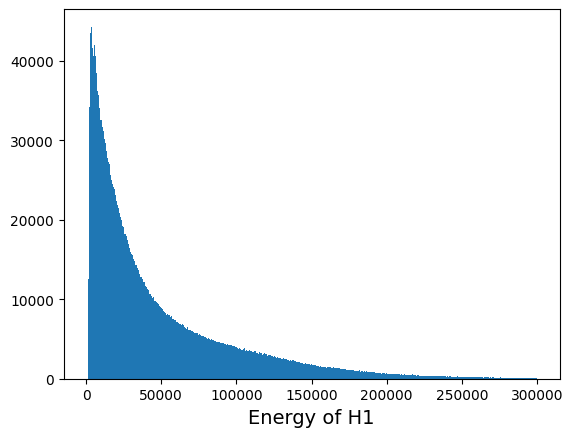

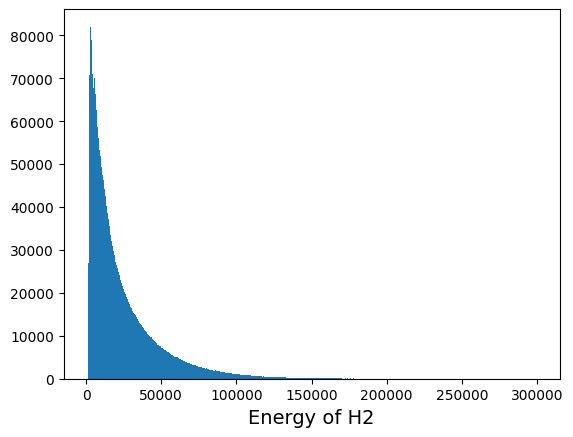

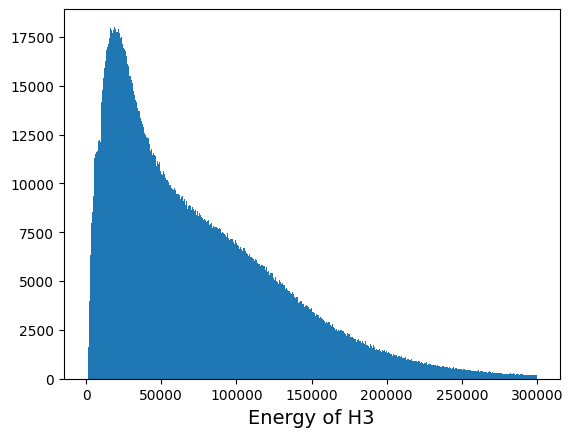

In [33]:
#do the maths here.E
#E_k
c = 2.998e8
K_mass = 493.7  #MeV/c^2
E1 = np.sqrt(H1_Ptot**2 + K_mass**2)
E2 = np.sqrt(H2_Ptot**2 + K_mass**2)    
E3 = np.sqrt(H3_Ptot**2 + K_mass**2)
E_B = E1 + E2 + E3
print(E_B)
plt.figure();
plt.hist (E_B, bins=1000, range=(0,300000));
plt.xlabel('Total Energy of B', fontsize=14);
plt.figure();
plt.hist(E1, bins=1000, range=(0,300000));
plt.xlabel('Energy of H1', fontsize=14);
plt.figure();
plt.hist(E2, bins=1000, range=(0,300000));
plt.xlabel('Energy of H2', fontsize=14);
plt.figure();
plt.hist(E3, bins=1000, range=(0,300000));
plt.xlabel('Energy of H3', fontsize=14);

#Now we can plot the energy of the mother particle

We have now completed the initial steps and begun to work through what we need to with the data. This is a(nother) perfect moment to take a coffee!

Having discovered all of the relevant information about our daughter particles, we need to combine the measurements about them into a single mother - which will be our B<sup>+</sup> or our B<sup>-</sup>

Having found our momentum and energies of the particles we can use these quantities to find our experimental mass (not the theoretical mass as we have used for the reconstruction).

When we calculate this, we will get a distribution of masses. This is due to errors in the measurements made either by the detector, or in the experiment itself. We hope to have a reasonably narrow peak to work with, but, sometimes this is not possible.

Additionally there will be other particles in the detector - which means our daughters might have come from two or even three different processes. Events which don't come from the same process will give a higher or lower mass than we are looking for. This is typically called the *background* while events which come from our event of interest are called the *signal*

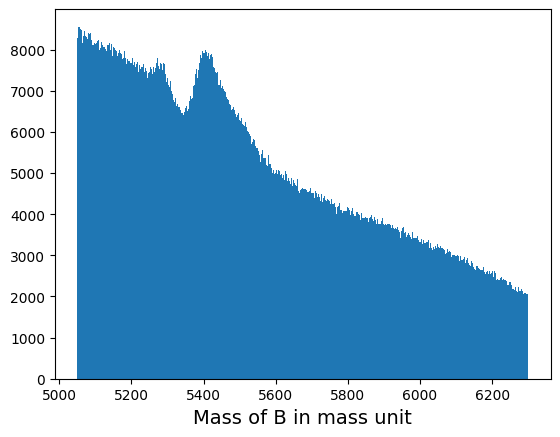

In [34]:
#Energy and momentum is conserved so we can find the quantities for B from her daughters
#E_B = E1 + E2 + E3
M_B = np.sqrt(E_B**2 - B_Ptot**2)
plt.figure();
plt.hist(M_B, bins=1000)
plt.xlabel('Mass of B in mass unit', fontsize=14);

#Now plot a histogram of the range of masses of the B meson.

#Does this match what we would expect from theory?

#Hint - look it up

We know that some of our particles are the B<sup>+</sup> and some are the B<sup>-</sup> particle. There will also be some particles in our system that are not coming from a genuine B<sup>+/-</sup> or are a B<sup>+/-</sup> but are not constructed from Kaons.

We have some tools available to help:-

  *  During detection, software attributes the probability of a particle being a Kaon or a Pion (in the H1_ProbK or H1_ProbPi variable)
  * The detector also knows *pretty well* if the particle was a Muon - since it has detectors specifically for these. So it can attribute a 0 or a 1 to this probability
  * The reconstructed vertex has a some kind of quality associated with it (we call this the Vertex χ2 (this is the variable B_VertexChi2). This is the statistical measure that determines how well we found a single point to be the source of all three particles.



In order to get a better result, we should select our data to have the properties we desire and make some rules (often called a selection) to trim away data we don't want to include for various reasons. e.g. we know we don't have any muons in our decay - so any time H1/H2/H3 are a muon they should be excluded. The other variables are not so clear - so we can plot them to make a decision.

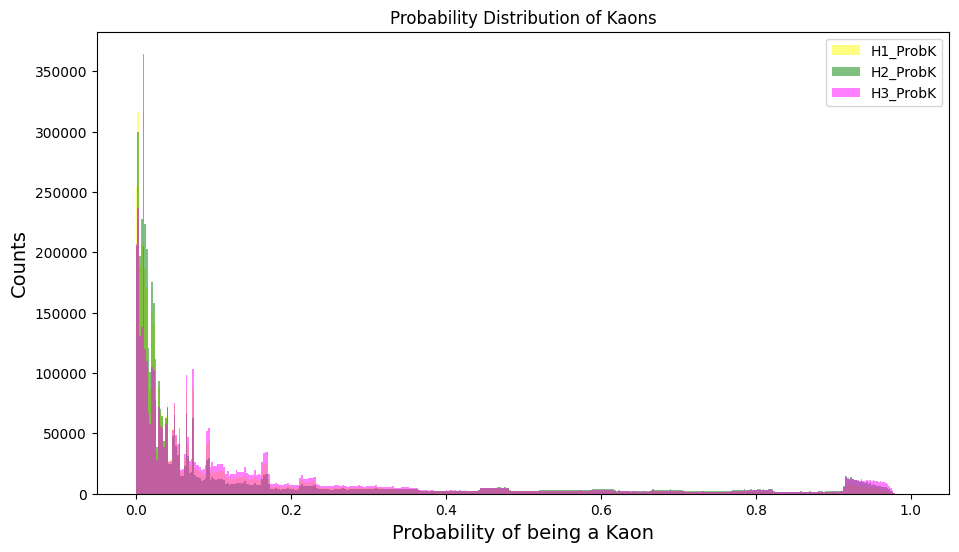

In [44]:
import matplotlib.pyplot as plt

# Assuming H1_ProbK, H2_ProbK, and H3_ProbK are your data arrays
plt.figure(figsize=(11,6))
plt.hist(H1_ProbK, bins=450, range=(0,1), alpha=0.5, label='H1_ProbK',color = 'yellow')
plt.hist(H2_ProbK, bins=450, range=(0,1), alpha=0.5, label='H2_ProbK', color = 'green')
plt.hist(H3_ProbK, bins=450, range=(0,1), alpha=0.5, label='H3_ProbK', color = 'magenta')

plt.xlabel('Probability of being a Kaon', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Probability Distribution of Kaons')
plt.legend()
plt.show()


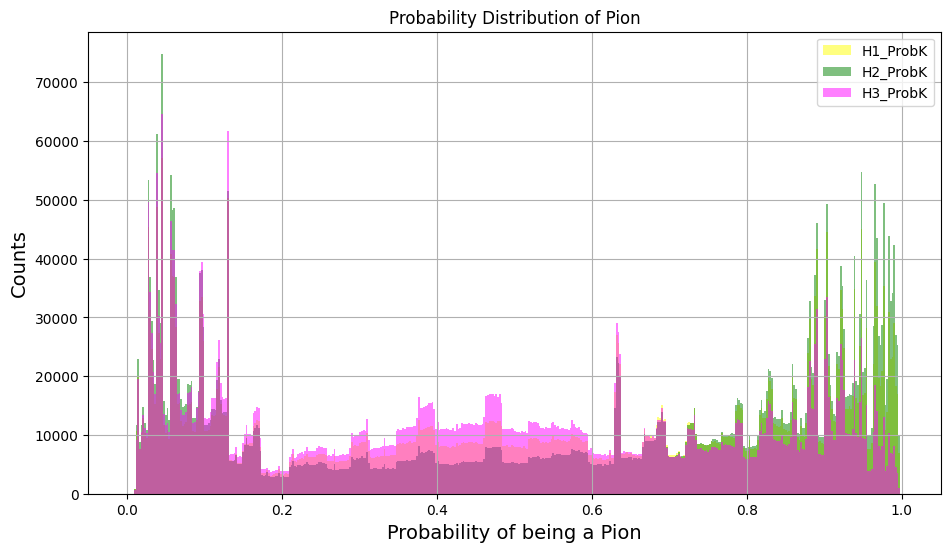

In [45]:
import matplotlib.pyplot as plt

# Assuming H1_ProbK, H2_ProbK, and H3_ProbK are your data arrays
plt.figure(figsize=(11,6))
plt.hist(H1_ProbPi, bins=450, range=(0,1), alpha=0.5, label='H1_ProbK', color = 'yellow')
plt.hist(H2_ProbPi, bins=450, range=(0,1), alpha=0.5, label='H2_ProbK', color = 'green')
plt.hist(H3_ProbPi, bins=450, range=(0,1), alpha=0.5, label='H3_ProbK', color = 'magenta')

plt.xlabel('Probability of being a Pion', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Probability Distribution of Pion')
plt.legend()
plt.grid()
plt.show()
#barely see yellow cgeck

Using these plots, we can now think about making a preselection. This has some format like the below:

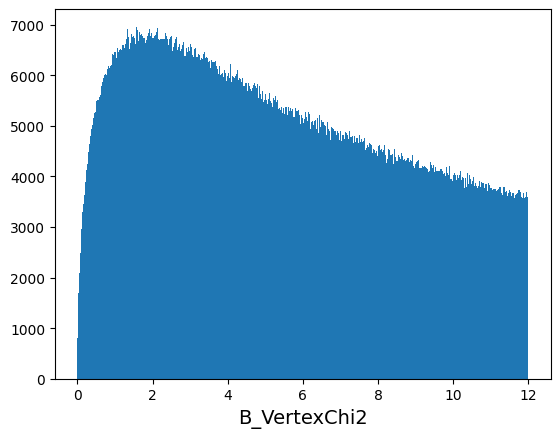

In [37]:
plt.figure();
plt.hist (B_VertexChi2, bins=1000);
plt.xlabel('B_VertexChi2', fontsize=14);
# Plot any other variables from the list above 

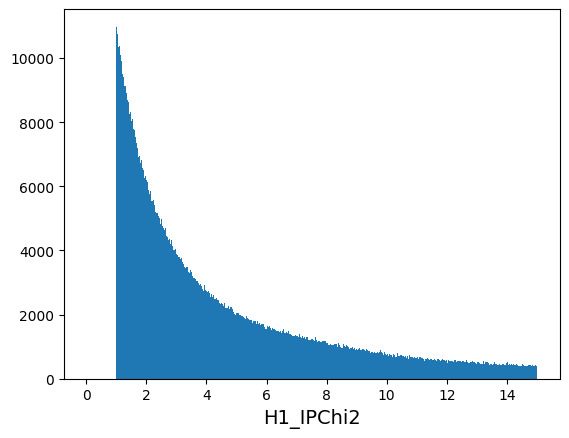

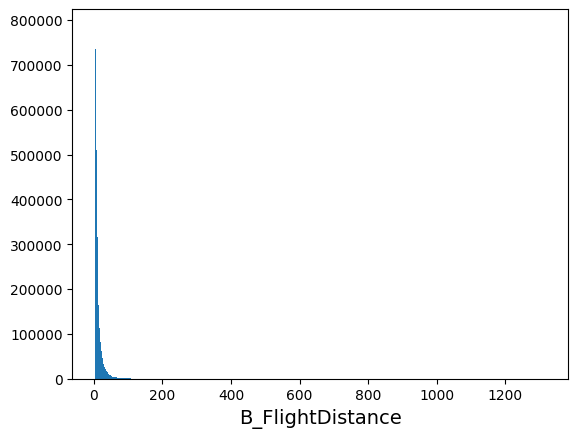

<Figure size 640x480 with 0 Axes>

In [40]:
plt.figure();
plt.hist (H1_IPChi2, bins=1000, range=(0,15));
plt.xlabel('H1_IPChi2', fontsize=14);
plt.figure();
plt.hist(B_flightDistance, bins=1000); 
plt.xlabel('B_FlightDistance', fontsize=14);
plt.figure();

In [41]:
#This example is for each daughter particle to have a Probability of being a Pion being more than 90% and H1 to not be a muon, H2 to not be an electron and H3 to be an elephant.
#This is not a good choice of selection - you should make your own :)
#frame : 
#selection=(branches['H1_ProbPi']>0.9) && (branches['H2_ProbPi']>0.9) && (branches['H3_ProbPi']>0.9) && (branches['H1_isMuon']!==1 && (branches['H2_isElectron'] == 1 && (branches['H3_isElephant']==1)
selection = (branches['H1_ProbK'] > 0.2) & \
            (branches['H2_ProbK'] > 0.2) & \
            (branches['H3_ProbK'] > 0.2) & \
            (branches['H1_ProbPi'] < 0.8) & \
            (branches['H2_ProbPi'] < 0.8) & \
            (branches['H3_ProbPi'] < 0.8) & \
            (branches['H1_isMuon'] != 1) & \
            (branches['H2_isMuon'] != 1) & \
            (branches['H3_isMuon'] != 1)

In [ ]:
#To apply the selection - we can use the selection command after our instruction e.g.:
trimTree=branches['H2_PX'][selection]
#probably we can make this more generic - try below if you like...
#So now we take our data in tree and apply selection to it (so only events which comply with those rules are kept) and put the new data in trimTree
trimmass = M_B[selection]
#Try plotting our H2_PX distribution with and without the selection and spot the differences...

In [64]:
#trimming data: 
def trim(selection):
    H1_PXtrim = branches['H1_PX'][selection]
    H1_pYtrim = branches['H1_PY'][selection]
    H1_PZtrim = branches['H1_PZ'][selection]
    H1_ProbKtrim = branches['H1_ProbK'][selection]
    H1_ProbPitrim = branches['H1_ProbPi'][selection]
    H1_isMuontrim = branches['H1_isMuon'][selection]
    H2_PXtrim = branches['H2_PX'][selection]
    H2_pYtrim = branches['H2_PY'][selection]
    H2_PZtrim = branches['H2_PZ'][selection]
    H3_PXtrim = branches['H3_PX'][selection]
    H3_pYtrim = branches['H3_PY'][selection]
    H3_PZtrim = branches['H3_PZ'][selection]  
    return H1_PXtrim, H1_pYtrim, H1_PZtrim, H1_ProbKtrim, H1_ProbPitrim, H1_isMuontrim, H2_PXtrim, H2_pYtrim, H2_PZtrim, H3_PXtrim, H3_pYtrim, H3_PZtrim

H1_PXtrim, H1_pYtrim, H1_PZtrim, H1_ProbKtrim, H1_ProbPitrim, H1_isMuontrim, H2_PXtrim, H2_pYtrim, H2_PZtrim, H3_PXtrim, H3_pYtrim, H3_PZtrim = trim(selection) # trim the data after we set the function to do it

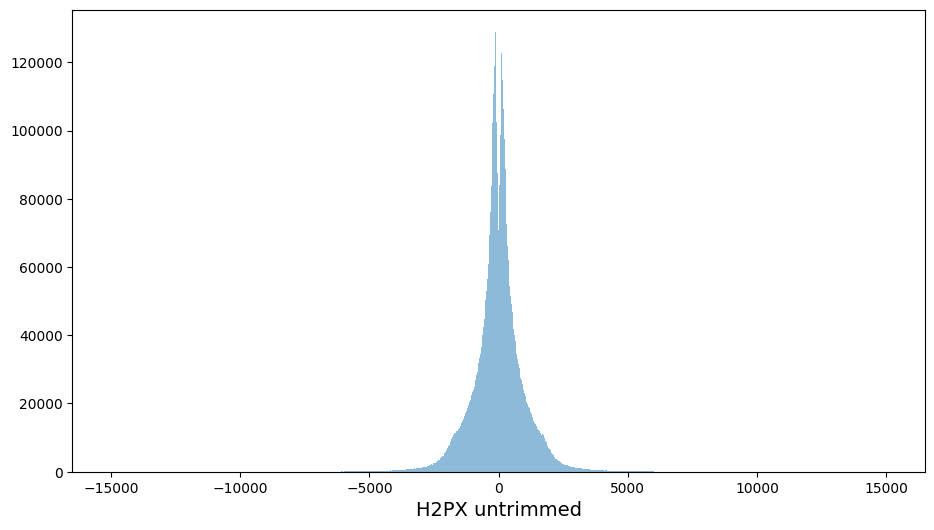

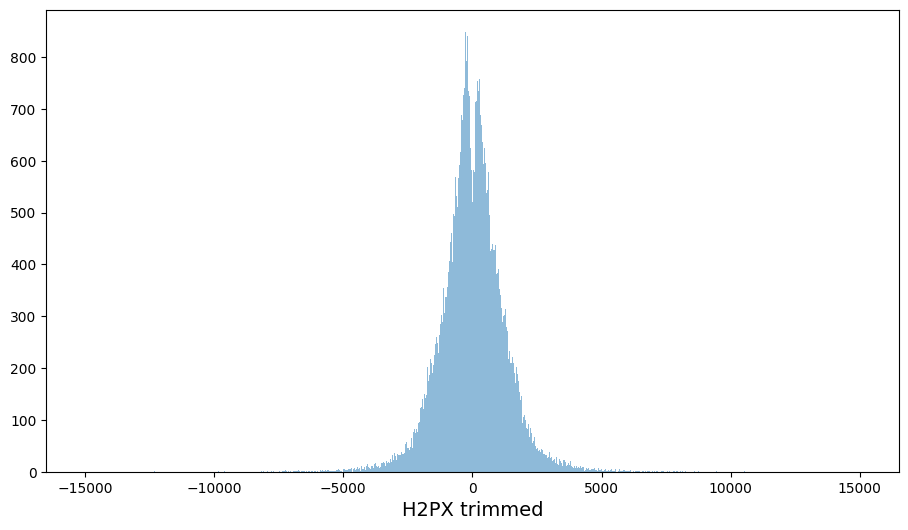

In [ ]:
plt.figure(figsize=(11,6));
plt.hist(H2_PX, bins=1000, range=(-15000,15000), alpha=0.5, label='H2_PX');
plt.xlabel('H2PX untrimmed', fontsize=14);
#trim size - trimmed down : 
plt.figure(figsize=(11,6));
plt.hist(trimTree, bins=1000, range=(-15000,15000), alpha=0.5, label='H2_PX');
plt.xlabel('H2PX trimmed', fontsize=14);

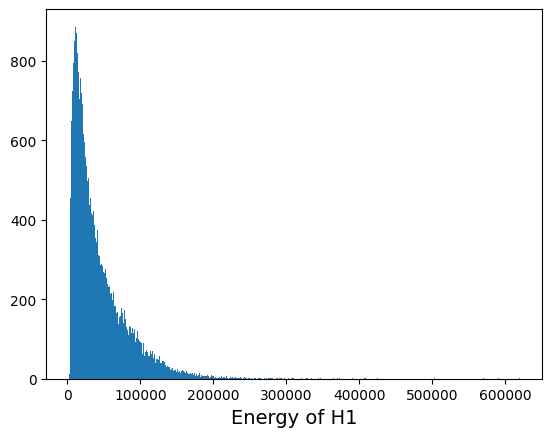

In [66]:
plt.figure();
plt.hist(E1[selection], bins=1000);
plt.xlabel('Energy of H1', fontsize=14);


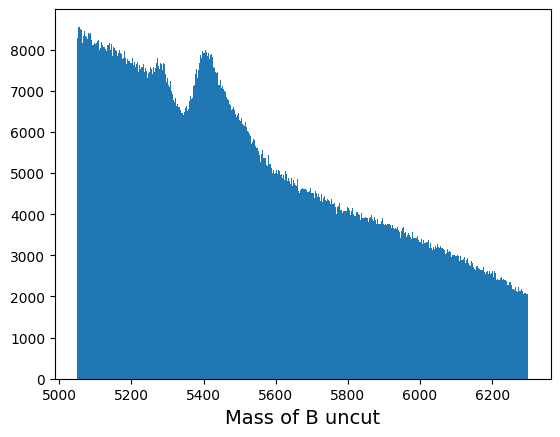

In [ ]:
#Now as a good check, we should see the effect of applying our trims.
plt.figure();
plt.hist (M_B, bins=1000);
plt.xlabel('Mass of B untrim', fontsize=14);

#plt.figure();
#plt.hist(M_B[selection], bins=1000);
#plt.xlabel('Mass of B trim', fontsize=14);
#On one histogram, plot the B meson mass, from both the pre-trims and the trimTree (post-trims)
#What do you notice about your histogram now?
#You can also use len() to find the number of entries in each.
#len(M_B), len(M_B[selection])


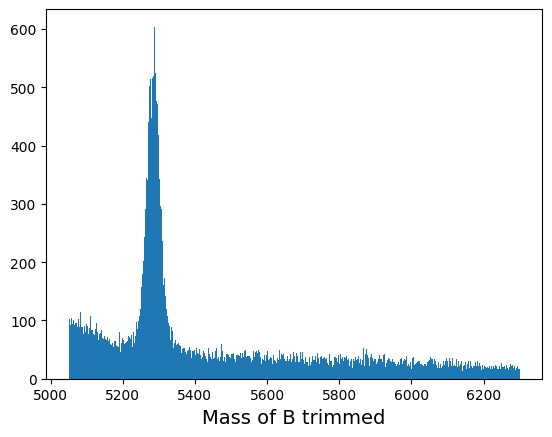

In [69]:
#For B mass trimmed: 
#total p of H1, H2, H3
def P_tot(H1_PX, H1_pY, H1_PZ, H2_PX, H2_pY, H2_PZ, H3_PX, H3_pY, H3_PZ):
    H1_totP = np.sqrt(H1_PX**2 + H1_pY**2 + H1_PZ**2)
    H2_totP = np.sqrt(H2_PX**2 + H2_pY**2 + H2_PZ**2)
    H3_totP = np.sqrt(H3_PX**2 + H3_pY**2 + H3_PZ**2)
    return H1_totP, H2_totP, H3_totP
#total p of B
def B_totP(H1_PX, H1_pY, H1_PZ, H2_PX, H2_pY, H2_PZ, H3_PX, H3_pY, H3_PZ):
    x_pot = (H1_PX + H2_PX + H3_PX)**2
    y_pot = (H1_pY + H2_pY + H3_pY)**2
    z_pot = (H1_PZ + H2_PZ + H3_PZ)**2
    B_totP = np.sqrt(x_pot + y_pot + z_pot)
    return B_totP

#energy B
def E_B(H1_Ptot, H2_Ptot, H3_Ptot):
    E1 = np.sqrt(H1_Ptot**2 + K_mass**2)
    E2 = np.sqrt(H2_Ptot**2 + K_mass**2)
    E3 = np.sqrt(H3_Ptot**2 + K_mass**2)
    E = E1 + E2 + E3
    return E1, E2, E3, E

# Ei = total E from Hi 
# E is total Energy
def M_B_E(E, B_totP): # M_B name already used :(
    M_B = np.sqrt(E**2 - B_totP**2)
    return M_B

def M_B_P(H1_PX, H2_PX, H3_PX, H1_pY, H2_pY, H3_pY, H1_PZ, H2_PZ, H3_PZ):
    P1, P2, P3 = P_tot(H1_PX, H1_pY, H1_PZ, H2_PX, H2_pY, H2_PZ, H3_PX, H3_pY, H3_PZ)
    B_P = B_totP(H1_PX, H1_pY, H1_PZ, H2_PX, H2_pY, H2_PZ, H3_PX, H3_pY, H3_PZ)
    E1, E2, E3, E = E_B(P1, P2, P3)
    M_B = M_B_E(E, B_P)
    return M_B

M_B_trim = M_B_P(H1_PXtrim, H2_PXtrim, H3_PXtrim, H1_pYtrim, H2_pYtrim, H3_pYtrim, H1_PZtrim, H2_PZtrim, H3_PZtrim)
plt.figure();
plt.hist(M_B_trim, bins=1000);
plt.xlabel('Mass of B trimmed', fontsize=14);

#checking no of entries
print(len(M_B), len(M_B_trim))

In [72]:
#checking no of entries
print("Original number of Bayons:",  len(M_B), "Number of Baryons after trimming the data : ", len(M_B_trim))

Original number of Bayons: 5135823 Number of Baryons after trimming the data :  59151


# How do we count the number of events?

We now have a histogram of events that we have reconstructed as a B meson. But some of these events are caused by a co-incidence of events which would still occur if there were no B mesons actually produced. We call this the background. Background and signal are indistinguishable now as the detector cannot tell the difference and our trims were unable to remove the events for physics reasons. We can do some statistical analysis, if we know the approximate shapes of our signal and our background. Just like a least-squares fitting we can run a fit routine to minimise the error between the fitted curve and our data. As an example, if we know our data has an exponential background and a gaussian signal:

![Gaussian+Exp Background](https://twiki.cern.ch/twiki/pub/RooStats/RooStatsTutorialsJune2013/GausExpModelFit.png)

Here the red line represents our signal, the blue dotted line is our background and the solid blue line is our combined curve. The graph also shows the number of signal events and the number of background events. The signal now is a tiny fraction of the total data shown in the plot.

In order to do this, we need to build a fit model, around which the software can try to fit our data.

We use RooFit for this, which includes:
* Gaussian
* Exponential
* Chebychev
* Crystal Ball
* Breit-Wigner

As well as several other choices.

Typically exponential and Chebychev functions are used for background and Gaussian, Crystal Ball and Breit-Wigner are used for signal. We can also combine them (e.g. 1 crystal ball, 1 gaussian, 1 exponential) in various ways.

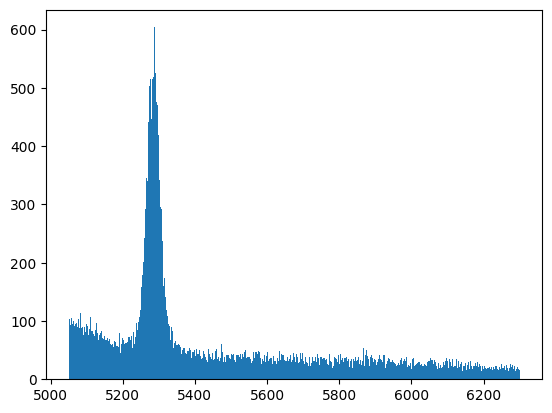

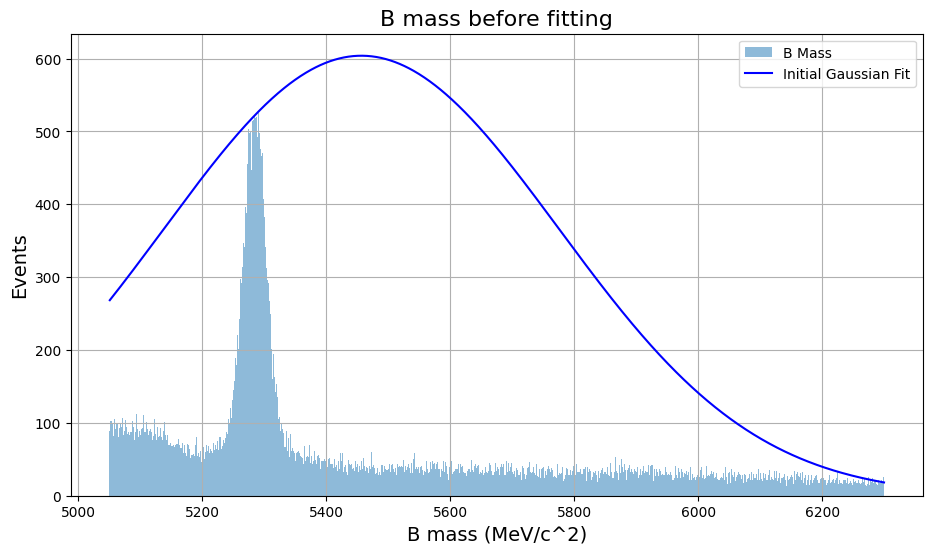

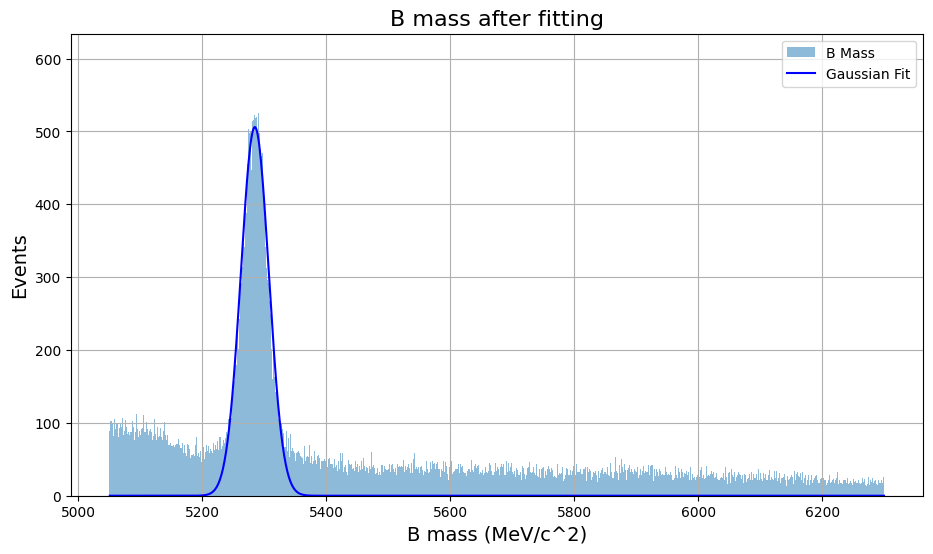

In [76]:
# Grab another package
from scipy.optimize import curve_fit

# Start by defining the variable we are interested in...
B_Mass = M_B_trim

# we make a plot (plt.hist) and then we extract the bin height and it's edges from the plot...
bin_height, bin_edge, _ = plt.hist(B_Mass, bins=1000, range=(min(B_Mass), max(B_Mass)), label="B Mass")

# now we need to turn this into the x and y data for our fit. *Be careful* - you don't want the edges of the histogram bins directly - but something related
x_data = (bin_edge[:-1] + bin_edge[1:]) / 2
y_data = bin_height
initial_values = [0.1, 0.2, 0.3]  # some initial values, you can change this to what you see fit
#Create a Gauss function for fitting - nothing needs changing here
def gauss(x, *p):
    A, mu, sigma = p
    return A * np.exp(-(x - mu) ** 2 / (2. * sigma ** 2))

#initial para

InitialParameters = [max(y_data), np.mean(B_Mass), np.std(B_Mass)]  
# Get the fitted curve - some things need changing here
optimisedParameters, pcov = curve_fit(gauss, x_data, y_data, p0=InitialParameters)
#note you need to pick some initial parameters in p0= above!

A, mu, sigma_A = optimisedParameters
a_uncertainty, mu_uncertainty, sigma_uncertainty = [np.sqrt(pcov[j, j]) for j in range(3)]  #check bc sus


y_fit_0 = gauss(x_data, *InitialParameters)
y_fit_optimised = gauss(x_data, *optimisedParameters)
#hist B_mass inital fit
plt.figure(figsize=(11,6))
plt.hist(B_Mass, bins=1000, range=(min(B_Mass), max(B_Mass)), label="B Mass", alpha = 0.5)
plt.plot(x_data, y_fit_0, label='Initial Gaussian Fit', color = 'blue')
plt.xlabel('B mass (MeV/c^2)', fontsize=14)
plt.ylabel('Events', fontsize=14)
plt.legend()
plt.title("B mass before fitting", fontsize = 16)
plt.grid()
plt.show()

# after gauss : 
plt.figure(figsize=(11,6))
plt.hist(B_Mass, bins=1000, range=(min(B_Mass), max(B_Mass)), label="B Mass", alpha = 0.5)
plt.plot(x_data, y_fit_optimised, label='Gaussian Fit', color = 'blue')
plt.xlabel('B mass (MeV/c^2)', fontsize=14)
plt.ylabel('Events', fontsize=14)
plt.legend()
plt.title("B mass after fitting", fontsize = 16)
plt.grid()
plt.show()
    # Now do some overlaying in the plotting environment - nothing major needs changing here - just label it well



C:\Users\dj875\AppData\Local\Temp\ipykernel_13084\1044360865.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_data, y_fit_exponential, 'r-', label='Exponential Fit', color = 'blue')


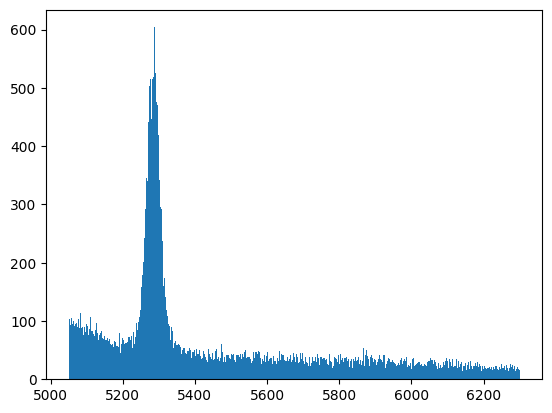

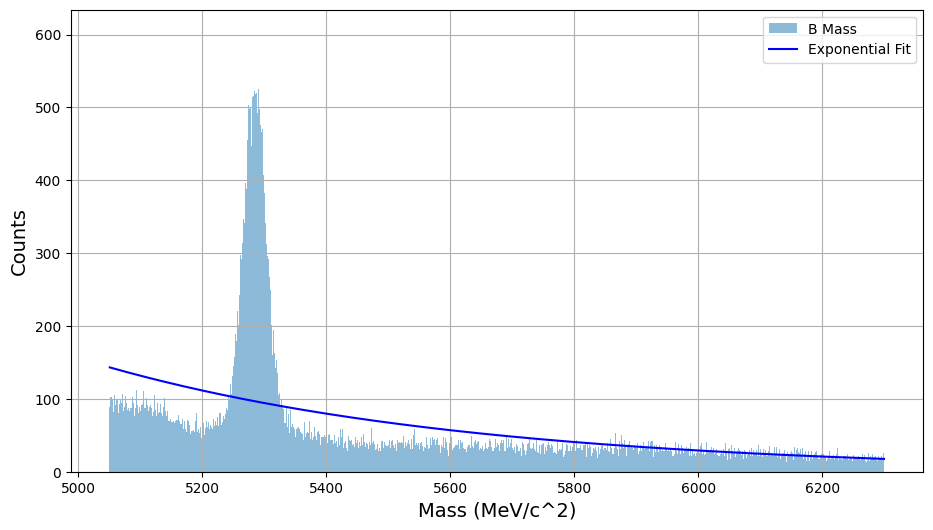

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#expo fit
def exponential(x, B, C):
    """ Exponential Decay Function """
    return B * np.exp(-C * x)

initial_values_exponential = [max(y_data)*0.1, -0.0004]  # B, C

optimisedParameters_exponential, pcov = curve_fit(exponential, x_data, y_data, p0=initial_values_exponential)
B, C = optimisedParameters_exponential
B_uncertainty, C_uncertainty = [np.sqrt(pcov[j, j]) for j in range(2)]

#then get y fit
y_fit_exponential = exponential(x_data, B, C)

bin_height, bin_edge, _ = plt.hist(B_Mass, bins=1000, range=(min(B_Mass), max(B_Mass)), label="B Mass")
x_data = (bin_edge[:-1] + bin_edge[1:]) / 2
y_data = bin_height

plt.figure(figsize=(11,6))
plt.hist(B_Mass, bins=1000, range=(min(B_Mass), max(B_Mass)), label="B Mass", alpha = 0.5)
plt.plot(x_data, y_fit_exponential, 'r-', label='Exponential Fit', color = 'blue')
plt.xlabel("Mass (MeV/c^2)", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.legend()
plt.grid()
plt.show()

#do curve on untrim version as well




C:\Users\dj875\AppData\Local\Temp\ipykernel_13084\3697189184.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_data, y_fit_exponential, 'r-', label='Exponential Fit', color = 'red')


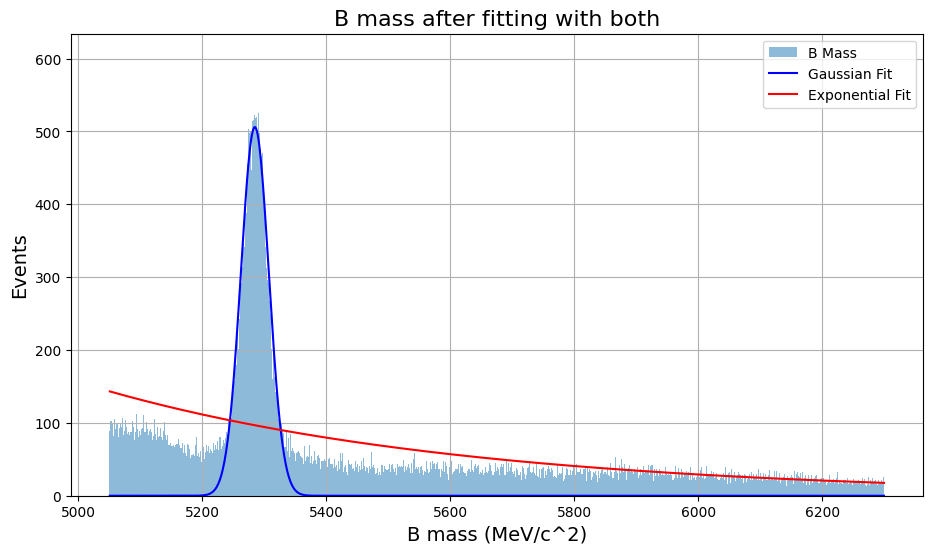

In [90]:
#2 fit 1 graph
plt.figure(figsize=(11,6))
plt.hist(B_Mass, bins=1000, range=(min(B_Mass), max(B_Mass)), label="B Mass", alpha = 0.5)
plt.plot(x_data, y_fit_optimised, label='Gaussian Fit', color = 'blue')
plt.plot(x_data, y_fit_exponential, 'r-', label='Exponential Fit', color = 'red')
plt.xlabel('B mass (MeV/c^2)', fontsize=14)
plt.ylabel('Events', fontsize=14)
plt.legend()
plt.title("B mass after fitting with both", fontsize = 16)
plt.grid()
plt.show()

C:\Users\dj875\AppData\Local\Temp\ipykernel_13084\2915825125.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_data, y_fit_comb_expo, 'r-', label='Exponential Fit', color = 'red')


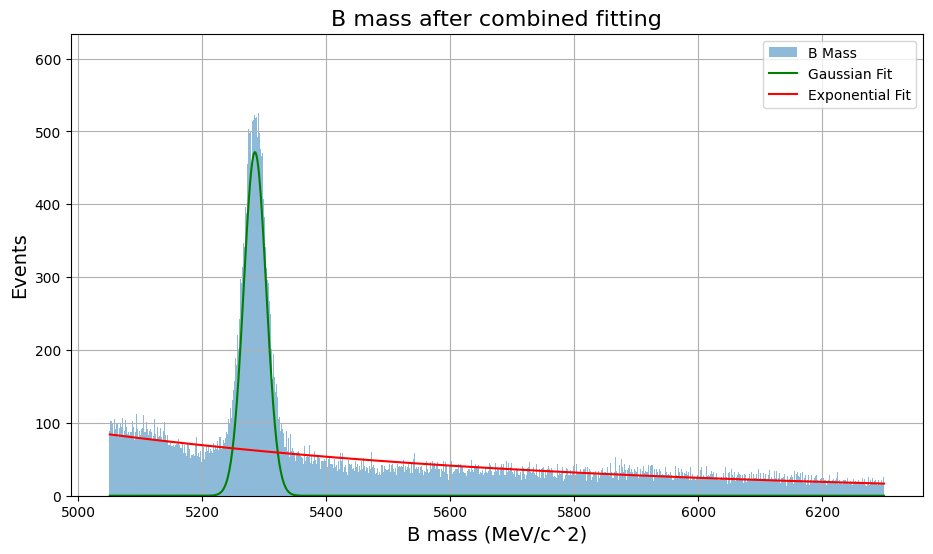

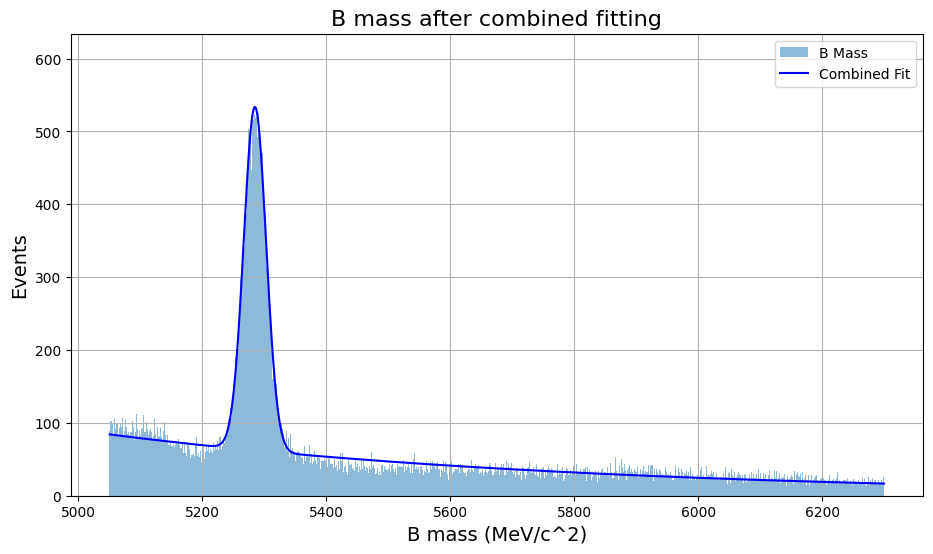

In [93]:
#combine the two fits
def gauss_exponential(x, A, mu, sigma, B, C):
    return gauss(x, A, mu, sigma) + exponential(x, B, C)

initial_values_combined = [max(y_data), np.mean(B_Mass), np.std(B_Mass), max(y_data)*0.1, -0.0004]  # A, mu, sigma, B, C
def params_combined(initial_values_combined, x_data, y_data):
    optimisedParameters, pcov = curve_fit(gauss_exponential, x_data, y_data, p0=initial_values_combined)
    return optimisedParameters, pcov

optimisedParameters_combined, pcov_combined = params_combined(initial_values_combined, x_data, y_data)
A, mu, sigma, B, C = optimisedParameters_combined
uncertain_A, uncertain_mu, uncertain_sigma, uncertain_B, uncertain_C = [np.sqrt(pcov_combined[j, j]) for j in range(5)]

#fit y

y_fit_comb = gauss_exponential(x_data, *optimisedParameters_combined)
y_fit_comb_gauss = gauss(x_data, A, mu, sigma)
y_fit_comb_expo = exponential(x_data, B, C)

#not fully combine, just overlay to see differences compared to last fit
plt.figure(figsize=(11,6))
plt.hist(B_Mass, bins=1000, range=(min(B_Mass), max(B_Mass)), label="B Mass", alpha = 0.5)
#plt.plot(x_data, y_fit_comb, label='Combined Fit', color = 'blue')
plt.plot(x_data, y_fit_comb_gauss, label='Gaussian Fit', color = 'green')
plt.plot(x_data, y_fit_comb_expo, 'r-', label='Exponential Fit', color = 'red')
plt.xlabel('B mass (MeV/c^2)', fontsize=14)
plt.ylabel('Events', fontsize=14)
plt.legend()
plt.title("B mass after combined fitting", fontsize = 16)
plt.grid()
plt.show()

#fully combined
plt.figure(figsize=(11,6))
plt.hist(B_Mass, bins=1000, range=(min(B_Mass), max(B_Mass)), label="B Mass", alpha = 0.5)
plt.plot(x_data, y_fit_comb, label='Combined Fit', color = 'blue')
#plt.plot(x_data, y_fit_comb_gauss, label='Gaussian Fit', color = 'green')
#plt.plot(x_data, y_fit_comb_expo, 'r-', label='Exponential Fit', color = 'red')
plt.xlabel('B mass (MeV/c^2)', fontsize=14)
plt.ylabel('Events', fontsize=14)
plt.legend()
plt.title("B mass after combined fitting", fontsize = 16)
plt.grid()
plt.show()


C:\Users\dj875\AppData\Local\Temp\ipykernel_13084\3278782247.py:17: OptimizeWarning: Covariance of the parameters could not be estimated
  params_combined, _ = curve_fit(combined_model, x_data, y_data, p0=initial_values_combined)


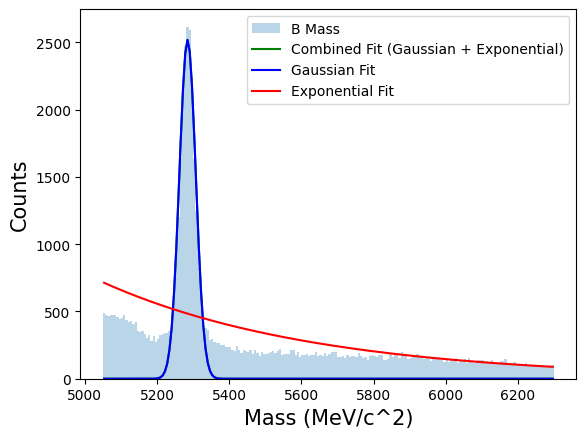

In [25]:
import numpy as np

import matplotlib.pyplot as plt
#keeping incase


# Assuming B_Mass, x_data, y_data, y_fit_gauss, and y_fit_expo are already defined

# Create a histogram of the data
plt.hist(B_Mass, bins=200, range=(min(B_Mass), max(B_Mass)), label="B Mass", alpha=0.3)
# Define a combined model for Gaussian + Exponential
def combined_model(x, A_gauss, mu, sigma, A_expo, k):
    return A_gauss * np.exp(-(x - mu)**2 / (2 * sigma**2)) + A_expo * np.exp(k * x)

# Initial guesses for the parameters
initial_values_combined = [max(y_data), np.mean(B_Mass), np.std(B_Mass), max(y_data), -0.001]

# Fit the combined model to the data
params_combined, _ = curve_fit(combined_model, x_data, y_data, p0=initial_values_combined)
y_fit_combined = combined_model(x_data, *params_combined)

# Plot the combined fit
plt.plot(x_data, y_fit_combined, 'g-', label='Combined Fit (Gaussian + Exponential)')
# Plot the Gaussian fit
plt.plot(x_data, y_fit, 'b-', label='Gaussian Fit')

# Plot the Exponential fit
plt.plot(x_data, y_fit_expo, 'r-', label='Exponential Fit')

# Add labels and legend
plt.xlabel("Mass (MeV/c^2)", fontsize=15)
plt.ylabel("Counts", fontsize=15)
plt.legend()

# Show the plot
plt.show()

Using this structure, you can in theory build whatever models you like!

Some recommendations (but not necessary to do ):-



*   Gauss+Exponential (as above)
*   Crystal Ball + Exponential
*   Gauss+Crystal Ball+Exponential (now you need to weigh the two signal peaks and then the total signal against total background)
*   Gauss+Chebychev
*   Two Crystal Balls + Exponential

So how good was the fit, and how many events do you have?

Look into the documentation for Curve_Fit from SciPy - and find the number of events and the error on them.

Neither of these measures would tell us if this was a good fit or not. Normally we use a χ2 test to do so - this is built into the image we made (so we can do frame.chiSquare() to get this data)

For each model you made, print the signal and background yields (with errors) and report the χ2

# Counting 

So we have now loaded our data; we have reconstructed information about the mother B meson and we have trim away any data which looks like it might not be what we are looking for. We have then plotted histograms of the mass of the B meson and used this to fit a model, a function to describe the events there. We now have to identify which of our events belong to the B<sup>+</sup> and how many of them belong to B<sup>-</sup>.

To do this, should split out data into two groups (and throw away data which doesn't comply with either decay)

We will be looking for the events which are


B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>

We can look for the number of positive and negative charges in H1, H2 and H3 (using the variable ```H1_Charge``` etc.). If we have 0 or 3 positive charges, we should throw the event away and if we have 1 it should be assigned be a B<sup>-</sup>, with 2 it should be a B<sup>+</sup>

Once we have defined if it's a B<sup>+</sup> or a B <sup>-</sup>, we should go ahead and ensure the pre-selection is applied and then plot our B mass, and fit the model to find the yield.

We can then calculate the assymetry from this equation:

$A=\frac{(N^{B-}-N^{B+})}{(N^{B-}+N^{B+})}$

Where N<sup>B+/- </sup> is the number of events found from the fitted yield of the signal from each data set.

The uncertainty on this result is given by:

$\sigma_A=\sqrt\frac{1-A^2}{N^{B-}+N^{B+}}$

Calculate these two values for your data and print them below:

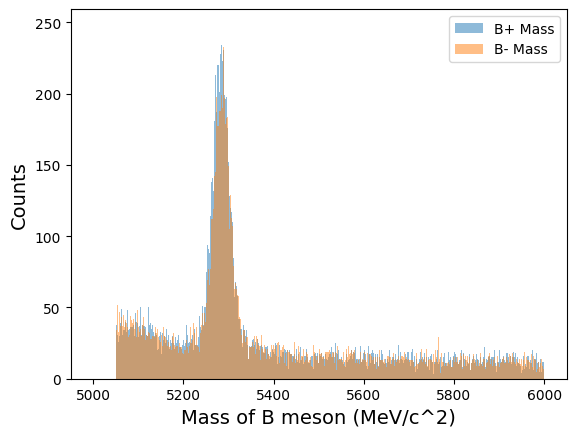

Number of B+ mesons: 30453
Number of B- mesons: 28698
Asymmetry (A): -0.029669828067150177
Uncertainty in Asymmetry (sigma_A): 0.004109866507571145


In [27]:
#fake news version



# Define the selection criteria for B+ and B- mesons
B_plus_selection = (H1_charge + H2_charge + H3_charge == 1)
B_minus_selection = (H1_charge + H2_charge + H3_charge == -1)

# Apply the selection criteria
B_plus_mass = M_B[selection & B_plus_selection]
B_minus_mass  = M_B[selection & B_minus_selection]
#do curve for both B+ and B- mesons - not fun

# Plot the histograms for B+ and B- mesons
plt.figure();
plt.hist(B_plus_mass, bins=1000, range=(5000, 6000), alpha=0.5, label='B+ Mass');
plt.hist(B_minus_mass, bins=1000, range=(5000, 6000), alpha=0.5, label='B- Mass');
plt.xlabel('Mass of B meson (MeV/c^2)', fontsize=14);
plt.ylabel('Counts', fontsize=14);
plt.legend();
plt.show();

# Count the number of B+ and B- mesons
N_B_plus = len(B_plus_mass)
N_B_minus = len(B_minus_mass)

# Calculate the asymmetry
A = (N_B_minus - N_B_plus) / (N_B_minus + N_B_plus)
sigma_A = np.sqrt((1 - A**2) / (N_B_minus + N_B_plus))

print(f"Number of B+ mesons: {N_B_plus}")
print(f"Number of B- mesons: {N_B_minus}")
print(f"Asymmetry (A): {A}")
print(f"Uncertainty in Asymmetry (sigma_A): {sigma_A}")
#non, do area under the curve
#fit itm get some value in the parameter that gives area under the curve
# area = A * sigma * sqrt(2*pi) sigma is the width of the curve

c:\Users\dj875\Desktop\code\.vscode\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


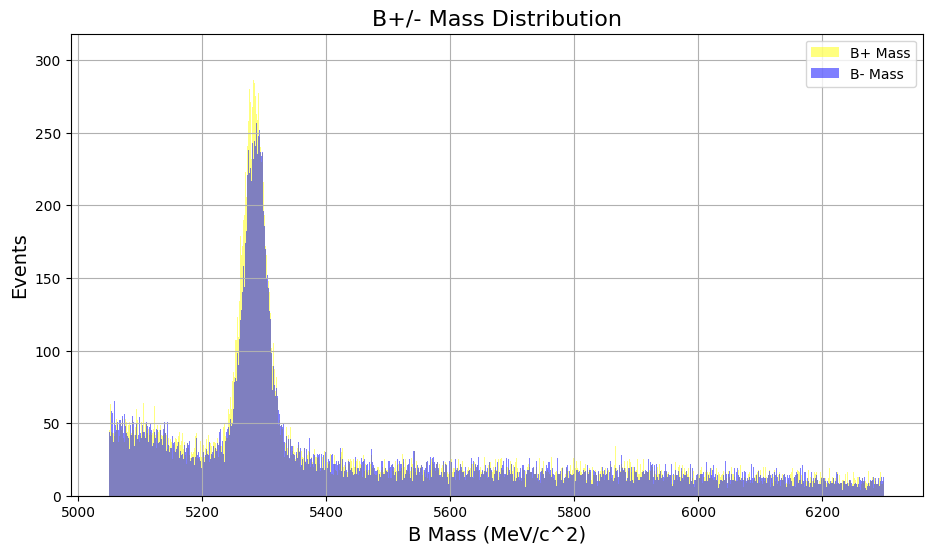

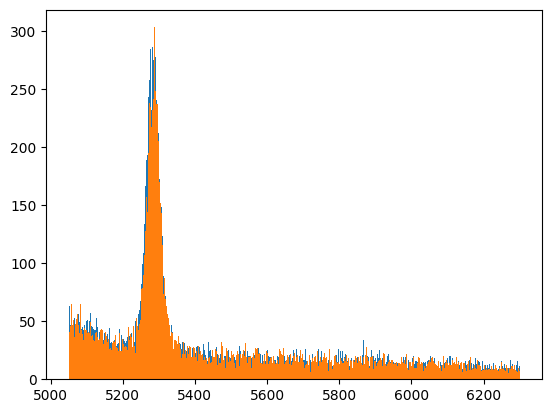

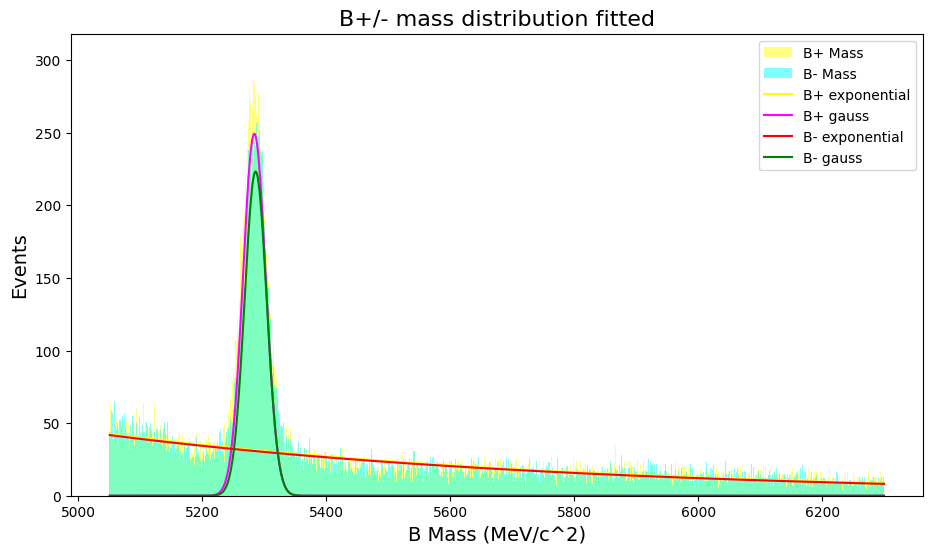

Parameters fitted for B+ : 
A = 249.36 ± 1.44
μ = 5283.72 ± 0.12
σ = 18.31 ± 0.12
B = 28195.99 ± 4331.89
C = 1.287e-03 ± 2.839e-05
Fitted parameters for B-:
A = 223.29 ± 1.46
μ = 5285.83 ± 0.13
σ = 17.76 ± 0.14
B = 30562.83 ± 4804.73
C = 1.306e-03 ± 2.907e-05
The number of B Plus: 1833.2744348208212
The number of B Min: 1591.7835411810327
The assymetry between B Plus and B Min is: -0.07050709661904357 with uncertainty: 0.017044483718911305


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
def P_total(H1_PX, H2_PX, H3_PX, H1_PY, H2_PY, H3_PY, H1_PZ, H2_PZ, H3_PZ):
    H1_Ptot = np.sqrt(H1_PX**2 + H1_PY**2 + H1_PZ**2)
    H2_Ptot = np.sqrt(H2_PX**2 + H2_PY**2 + H2_PZ**2)
    H3_Ptot = np.sqrt(H3_PX**2 + H3_PY**2 + H3_PZ**2)
    return H1_Ptot, H2_Ptot, H3_Ptot

def B_total(H1_PX, H2_PX, H3_PX, H1_PY, H2_PY, H3_PY, H1_PZ, H2_PZ, H3_PZ):
    B_PX = H1_PX + H2_PX + H3_PX
    B_PY = H1_PY + H2_PY + H3_PY
    B_PZ = H1_PZ + H2_PZ + H3_PZ
    B_Ptot = np.sqrt(B_PX**2 + B_PY**2 + B_PZ**2)
    return B_Ptot

Mass_Kaon = 493.677

def E_B_tot(H1_Ptot, H2_Ptot, H3_Ptot, Mass_Kaon):
    H1_E = np.sqrt(H1_Ptot**2 + Mass_Kaon**2)
    H2_E = np.sqrt(H2_Ptot**2 + Mass_Kaon**2)
    H3_E = np.sqrt(H3_Ptot**2 + Mass_Kaon**2)
    E_Tot = H1_E + H2_E + H3_E
    return H1_E, H2_E, H3_E, E_Tot

def Mass_B(E_Tot, B_Ptot):
    return np.sqrt(E_Tot**2 - B_Ptot**2)

def M_B_ca(H1_PX, H2_PX, H3_PX, H1_PY, H2_PY, H3_PY, H1_PZ, H2_PZ, H3_PZ):
    B_Ptot = np.sqrt(B_PX**2 + B_PY**2 + B_PZ**2)
    return B_Ptot

def M_B_ca(H1_PX, H2_PX, H3_PX, H1_PY, H2_PY, H3_PY, H1_PZ, H2_PZ, H3_PZ):
    H1_Ptot, H2_Ptot, H3_Ptot = P_total(H1_PX, H2_PX, H3_PX, H1_PY, H2_PY, H3_PY, H1_PZ, H2_PZ, H3_PZ)
    B_Ptot= B_total(H1_PX, H2_PX, H3_PX, H1_PY, H2_PY, H3_PY, H1_PZ, H2_PZ, H3_PZ)
    H1_E, H2_E, H3_E, E_Tot = E_B_tot(H1_Ptot, H2_Ptot, H3_Ptot, Mass_Kaon)
    M_B = Mass_B(E_Tot, B_Ptot)
    return M_B

# Function for getting the trim data with an arbitrary selection
def trimming(selection):
    H1_PX_trim=branches['H1_PX'][selection]
    H2_PX_trim=branches['H2_PX'][selection]
    H3_PX_trim=branches['H3_PX'][selection]
    H1_PY_trim=branches['H1_PY'][selection]
    H2_PY_trim=branches['H2_PY'][selection]
    H3_PY_trim=branches['H3_PY'][selection]
    H1_PZ_trim=branches['H1_PZ'][selection]
    H2_PZ_trim=branches['H2_PZ'][selection]
    H3_PZ_trim=branches['H3_PZ'][selection]
    return H1_PX_trim, H2_PX_trim, H3_PX_trim, H1_PY_trim, H2_PY_trim, H3_PY_trim, H1_PZ_trim, H2_PZ_trim, H3_PZ_trim

# Define the charge variables
H1_Charge = branches['H1_Charge']
H2_Charge = branches['H2_Charge']
H3_Charge = branches['H3_Charge']

charge_selection_B_Plus = (H1_Charge + H2_Charge + H3_Charge == 1) & selection
charge_selection_B_Min = (H1_Charge + H2_Charge + H3_Charge == -1) & selection

# Get the trim data for the positive and negative kaons
H1_PX_trim_Plus, H2_PX_trim_Plus, H3_PX_trim_Plus, H1_PY_trim_Plus, H2_PY_trim_Plus, H3_PY_trim_Plus, H1_PZ_trim_Plus, H2_PZ_trim_Plus, H3_PZ_trim_Plus = trimming(charge_selection_B_Plus)
H1_PX_trim_Min, H2_PX_trim_Min, H3_PX_trim_Min, H1_PY_trim_Min, H2_PY_trim_Min, H3_PY_trim_Min, H1_PZ_trim_Min, H2_PZ_trim_Min, H3_PZ_trim_Min = trimming(charge_selection_B_Min)

# Get the masses of the positive and negative kaons
M_B_Plus = M_B_ca(H1_PX_trim_Plus, H2_PX_trim_Plus, H3_PX_trim_Plus, H1_PY_trim_Plus, H2_PY_trim_Plus, H3_PY_trim_Plus, H1_PZ_trim_Plus, H2_PZ_trim_Plus, H3_PZ_trim_Plus)
M_B_Min = M_B_ca(H1_PX_trim_Min, H2_PX_trim_Min, H3_PX_trim_Min, H1_PY_trim_Min, H2_PY_trim_Min, H3_PY_trim_Min, H1_PZ_trim_Min, H2_PZ_trim_Min, H3_PZ_trim_Min)
plt.figure(figsize=(11, 6))
plt.hist(M_B_Plus, bins=1000, range=(min(M_B_Plus), max(M_B_Plus)), label="B+ Mass", alpha=0.5, color='yellow')
plt.hist(M_B_Min, bins=1000, range=(min(M_B_Min), max(M_B_Min)), label="B- Mass", alpha=0.5, color='blue')  
plt.xlabel("B Mass (MeV/c^2)", fontsize=14)
plt.ylabel("Events", fontsize=14)
plt.title("B+/- Mass Distribution", fontsize=16)
plt.legend()
plt.grid()
plt.show()

# binning
bin_height_Plus, bin_edge_Plus, _=plt.hist(M_B_Plus, bins=1000, range=(min(M_B_Plus), max(M_B_Plus)), label = "B+ mass")
bin_height_Min, bin_edge_Min, _=plt.hist(M_B_Min, bins=1000, range=(min(M_B_Min), max(M_B_Min)), label = "B+ mass")

# Get the x and y values for the positive and negative kaons, it is calculatd similarly as before
x_data_Plus = (bin_edge_Plus[1:] + bin_edge_Plus[:-1])/2
x_data_Min = (bin_edge_Min[1:] + bin_edge_Min[:-1])/2
y_data_Plus = bin_height_Plus
y_data_Min = bin_height_Min
def exp_and_gaus(x, A, mu, sigma, B, C):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2)) + B * np.exp(-C * x)

# Restating the function for getting the parameters
def get_paramaters(initialParametersCombined, x_data, y_data):
    optimisedParametersCombined, pcov = curve_fit(exp_and_gaus, x_data, y_data, p0=initialParametersCombined)
    return optimisedParametersCombined, pcov

initialParameters_B_Plus = [max(y_data_Plus), np.mean(M_B_Plus), np.std(M_B_Plus), max(y_data_Plus)*0.1, -0.0004]
initialParameters_B_Min = [max(y_data_Min), np.mean(M_B_Min), np.std(M_B_Min), max(y_data_Min)*0.1, -0.0004]
optimisedParameters_B_Plus, pcov_B_Plus = get_paramaters(initialParameters_B_Plus, x_data_Plus, y_data_Plus)
optimisedParameters_B_Min, pcov_B_Min = get_paramaters(initialParameters_B_Min, x_data_Min, y_data_Min)
A_Plus, mu_Plus, sigma_Plus, B_Plus, C_Plus = optimisedParameters_B_Plus
A_Plus_Uncertainty, mu_Plus_Uncertainty, sigma_Plus_Uncertainty, B_Plus_Uncertainty, C_Plus_Uncertainty = np.sqrt(np.diag(pcov_B_Plus))
A_Min, mu_Min, sigma_Min, B_Min, C_Min = optimisedParameters_B_Min
A_Min_Uncertainty, mu_Min_Uncertainty, sigma_Min_Uncertainty, B_Min_Uncertainty, C_Min_Uncertainty = np.sqrt(np.diag(pcov_B_Min))



def exponential_fit(x, B, C):
    return B * np.exp(-C * x)

def gauss(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

y_fit_exp_B_Plus = exponential_fit(x_data_Plus, B_Plus, C_Plus)
y_fit_gauss_B_Plus = gauss(x_data_Plus, A_Plus, mu_Plus, sigma_Plus)
y_fit_exp_B_Min = exponential_fit(x_data_Min, B_Min, C_Min)
y_fit_gauss_B_Min = gauss(x_data_Min, A_Min, mu_Min, sigma_Min)

# Plot the exponential and Gaussian fits for the combined optimised parameters for the positive and negative kaons
plt.figure(figsize=(11, 6))
plt.hist(M_B_Plus, bins=1000, range=(min(M_B_Plus), max(M_B_Plus)), label="B+ Mass", alpha=0.5, color='yellow')
plt.hist(M_B_Min, bins=1000, range=(min(M_B_Min), max(M_B_Min)), label="B- Mass", alpha=0.5, color='cyan') 
plt.plot(x_data_Plus, y_fit_exp_B_Plus, label='B+ exponential', color='yellow')
plt.plot(x_data_Plus, y_fit_gauss_B_Plus, label='B+ gauss', color='magenta')
plt.plot(x_data_Min, y_fit_exp_B_Min, label='B- exponential', color='red')
plt.plot(x_data_Min, y_fit_gauss_B_Min, label='B- gauss', color='green')
plt.xlabel("B Mass (MeV/c^2)", fontsize=14)
plt.ylabel("Events", fontsize=14)
plt.title("B+/- mass distribution fitted", fontsize=16)
plt.legend()
plt.show()

# Calculat the area under the Gaussian curves or the psitive and negative kaons, which are the number of kaons
# which will be used the calculate the assymetry
area_gauss_Plus = (A_Plus*sigma_Plus*np.sqrt(2* np.pi))/(max(x_data_Plus)-min(x_data_Plus))*200
area_gauss_Min = A_Min*sigma_Min*np.sqrt(2*np.pi)/(max(x_data_Min)-min(x_data_Min))*200
print("Parameters fitted for B+ : ")
print(f"A = {A_Plus:.2f} ± {A_Plus_Uncertainty:.2f}")
print(f"μ = {mu_Plus:.2f} ± {mu_Plus_Uncertainty:.2f}")
print(f"σ = {sigma_Plus:.2f} ± {sigma_Plus_Uncertainty:.2f}")
print(f"B = {B_Plus:.2f} ± {B_Plus_Uncertainty:.2f}")
print(f"C = {C_Plus:.3e} ± {C_Plus_Uncertainty:.3e}") 
print("Fitted parameters for B-:")
print(f"A = {A_Min:.2f} ± {A_Min_Uncertainty:.2f}")
print(f"μ = {mu_Min:.2f} ± {mu_Min_Uncertainty:.2f}")
print(f"σ = {sigma_Min:.2f} ± {sigma_Min_Uncertainty:.2f}")
print(f"B = {B_Min:.2f} ± {B_Min_Uncertainty:.2f}")
print(f"C = {C_Min:.3e} ± {C_Min_Uncertainty:.3e}") 
#number of positive and negative kaons under the gauss
print(f'The number of B Plus: {area_gauss_Plus}')
print(f'The number of B Min: {area_gauss_Min}')
# Calculate the assymetry and the error on the assymetry
assymetry = (area_gauss_Min-area_gauss_Plus)/(area_gauss_Min+area_gauss_Plus)
uncertainty_assymetry = np.sqrt(((1-assymetry**2)/(area_gauss_Min+area_gauss_Plus)))
# print the assymetry and the error on the assymetry
print(f"The assymetry between B Plus and B Min is: {assymetry} ± {uncertainty_assymetry}")

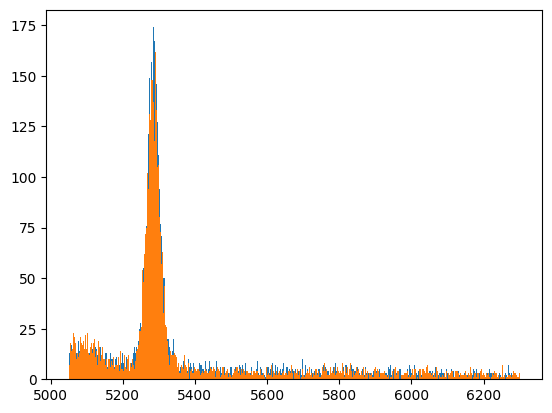

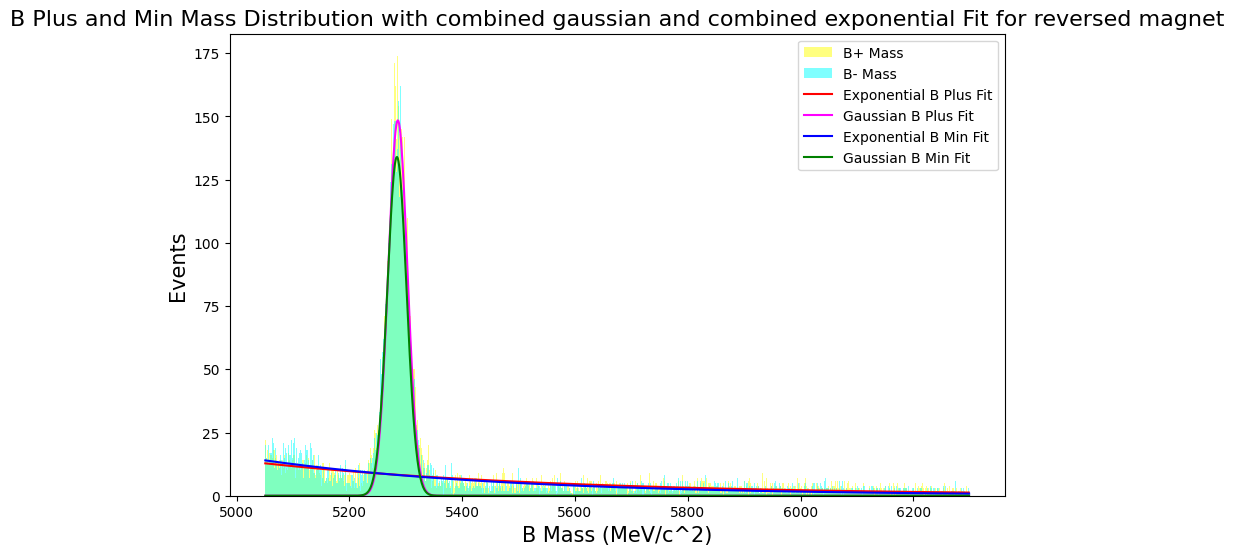

B+ up fitted:
A = 148.47 ± 0.85
μ = 5285.80 ± 0.11
σ = -16.95 ± 0.11
B = 158153.83 ± 63793.64
C = 1.865e-03 ± 7.592e-05
Fitted parameters for B- up:
A = 133.98 ± 0.82
μ = 5284.15 ± 0.12
σ = 17.16 ± 0.12
B = 1362161.25 ± 609647.43
C = 2.274e-03 ± 8.500e-05
The number of B Plus (up): -1011.0559967763528
The number of B Min (up): 923.5680318682718
Assymetry  between B+ and B- is: -22.113030411408374 ± 2.361726348551028
Comparision with reversed magent:
assymmetry: -0.07050709661904357 vs -22.113030411408374
Uncertainty: 0.017044483718911305 vs 2.361726348551028 


In [169]:
import uproot, awkward, numpy as np
import matplotlib.pylab as plt
from scipy.optimize import curve_fit
f_Up = uproot.open ("LHCb_Data/B2HHH_MagnetUp.root")
f_Up.keys()
Events_Up=f_Up['DecayTree']
branches_up=Events_Up.arrays()

H1_Charge_Up = Events_Up['H1_Charge'].array()
H2_Charge_Up = Events_Up['H2_Charge'].array()
H3_Charge_Up = Events_Up['H3_Charge'].array()

selection_Up = (
    (branches_up['H1_ProbK'] > 0.2) &  
    (branches_up['H2_ProbK'] > 0.2) &  
    (branches_up['H3_ProbK'] > 0.2) &  
    (branches_up['H1_ProbPi'] < 0.8) &  
    (branches_up['H2_ProbPi'] < 0.8) &  
    (branches_up['H3_ProbPi'] < 0.8) &  
    (branches_up['H1_isMuon'] != 1) &    
    (branches_up['H2_isMuon'] != 1) &    
    (branches_up['H3_isMuon'] != 1) &    
    (branches_up['H1_ProbK'] > branches_up['H1_ProbPi']) &  
    (branches_up['H2_ProbK'] > branches_up['H2_ProbPi']) &  
    (branches_up['H3_ProbK'] > branches_up['H3_ProbPi'])    
)


def trimming_up(selection_up):
    H1_PX_trim_up=branches_up['H1_PX'][selection_up]
    H2_PX_trim_up=branches_up['H2_PX'][selection_up]
    H3_PX_trim_up=branches_up['H3_PX'][selection_up]
    H1_PY_trim_up=branches_up['H1_PY'][selection_up]
    H2_PY_trim_up=branches_up['H2_PY'][selection_up]
    H3_PY_trim_up=branches_up['H3_PY'][selection_up]
    H1_PZ_trim_up=branches_up['H1_PZ'][selection_up]
    H2_PZ_trim_up=branches_up['H2_PZ'][selection_up]
    H3_PZ_trim_up=branches_up['H3_PZ'][selection_up]
    return H1_PX_trim_up, H2_PX_trim_up, H3_PX_trim_up, H1_PY_trim_up, H2_PY_trim_up, H3_PY_trim_up, H1_PZ_trim_up, H2_PZ_trim_up, H3_PZ_trim_up

def P_total_up(H1_PX_up, H2_PX_up, H3_PX_up, H1_PY_up, H2_PY_up, H3_PY_up, H1_PZ_up, H2_PZ_up, H3_PZ_up):
    H1_Ptot_up= np.sqrt(H1_PX_up**2 + H1_PY_up**2 + H1_PZ_up**2)
    H2_Ptot_up= np.sqrt(H2_PX_up**2 + H2_PY_up**2 + H2_PZ_up**2)
    H3_Ptot_up= np.sqrt(H3_PX_up**2 + H3_PY_up**2 + H3_PZ_up**2)
    return H1_Ptot_up, H2_Ptot_up, H3_Ptot_up
def B_total_up(H1_PX_up, H2_PX_up, H3_PX_up, H1_PY_up, H2_PY_up, H3_PY_up, H1_PZ_up, H2_PZ_up, H3_PZ_up):
    X_Ptot_up = (H1_PX_up+ H2_PX_up + H3_PX_up)**2
    Y_Ptot_up = (H1_PY_up + H2_PY_up + H3_PY_up)**2
    Z_Ptot_up = (H1_PZ_up + H2_PZ_up +H3_PZ_up)**2
    B_Ptot_up=np.sqrt(X_Ptot_up + Y_Ptot_up+ Z_Ptot_up)
    return B_Ptot_up
Mass_Kaon = 493.7 # MeV/c^2

def E_B_tot_up(H1_Ptot_up, H2_Ptot_up, H3_Ptot_up, Mass_Kaon):
    H1_E_up = np.sqrt(H1_Ptot_up**2  + Mass_Kaon**2)
    H2_E_up = np.sqrt(H2_Ptot_up**2 + Mass_Kaon**2)
    H3_E_up = np.sqrt(H3_Ptot_up**2 + Mass_Kaon**2)
    E_Tot_up = H1_E_up + H2_E_up + H3_E_up
    return H1_E_up, H2_E_up, H3_E_up, E_Tot_up

def Mass_B_up(E_Tot_up, B_Ptot_up):
    M_B_up = np.sqrt(E_Tot_up**2 - B_Ptot_up**2)
    return M_B_up

def M_B_ca_up(H1_PX_up, H2_PX_up, H3_PX_up, H1_PY_up, H2_PY_up, H3_PY_up, H1_PZ_up, H2_PZ_up, H3_PZ_up):
    H1_Ptot_up, H2_Ptot_up, H3_Ptot_up = P_total_up(H1_PX_up, H2_PX_up, H3_PX_up, H1_PY_up, H2_PY_up, H3_PY_up, H1_PZ_up, H2_PZ_up, H3_PZ_up)
    B_Ptot_up= B_total_up(H1_PX_up, H2_PX_up, H3_PX_up, H1_PY_up, H2_PY_up, H3_PY_up, H1_PZ_up, H2_PZ_up, H3_PZ_up)
    H1_E_up, H2_E_up, H3_E_up, E_Tot_up = E_B_tot_up(H1_Ptot_up, H2_Ptot_up, H3_Ptot_up, Mass_Kaon)
    M_B_up = Mass_B_up(E_Tot_up, B_Ptot_up)
    return M_B_up


charge_selection_B_Plus_Up = (H1_Charge_Up + H2_Charge_Up + H3_Charge_Up == 1) & selection_Up
charge_selection_B_Min_Up = (H1_Charge_Up + H2_Charge_Up + H3_Charge_Up == -1) & selection_Up

H1_PX_Up_Plus, H2_PX_Up_Plus, H3_PX_Up_Plus, H1_PY_Up_Plus, H2_PY_Up_Plus, H3_PY_Up_Plus, H1_PZ_Up_Plus, H2_PZ_Up_Plus, H3_PZ_Up_Plus = trimming_up(charge_selection_B_Plus_Up)
H1_PX_Up_Min, H2_PX_Up_Min, H3_PX_Up_Min, H1_PY_Up_Min, H2_PY_Up_Min, H3_PY_Up_Min, H1_PZ_Up_Min, H2_PZ_Up_Min, H3_PZ_Up_Min = trimming_up(charge_selection_B_Min_Up)

M_B_Plus_Up = M_B_ca_up(H1_PX_Up_Plus, H2_PX_Up_Plus, H3_PX_Up_Plus, H1_PY_Up_Plus, H2_PY_Up_Plus, H3_PY_Up_Plus, H1_PZ_Up_Plus, H2_PZ_Up_Plus, H3_PZ_Up_Plus)
M_B_Min_Up = M_B_ca_up(H1_PX_Up_Min, H2_PX_Up_Min, H3_PX_Up_Min, H1_PY_Up_Min, H2_PY_Up_Min, H3_PY_Up_Min, H1_PZ_Up_Min, H2_PZ_Up_Min, H3_PZ_Up_Min)


bin_height_Plus_Up, bin_edge_Plus_Up, _=plt.hist(M_B_Plus_Up, bins=1000, range=(min(M_B_Plus_Up), max(M_B_Plus_Up)), label = "B+ mass Up")
bin_height_Min_Up, bin_edge_Min_Up, _=plt.hist(M_B_Min_Up, bins=1000, range=(min(M_B_Min_Up), max(M_B_Min_Up)), label = "B+ mass Up")


x_data_Plus_up = (bin_edge_Plus_Up[1:] + bin_edge_Plus_Up[:-1])/2
x_data_Min_up = (bin_edge_Min_Up[1:] + bin_edge_Min_Up[:-1])/2
y_data_Plus_up = bin_height_Plus_Up
y_data_Min_up = bin_height_Min_Up

def get_paramaters(initialParametersCombined, x_data, y_data):
    optimisedParametersCombined, pcov = curve_fit(exp_and_gaus, x_data, y_data, p0=initialParametersCombined)
    return optimisedParametersCombined, pcov

def gauss (x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

def exponential_fit(x, *p):
    B, C = p
    return B * np.exp(-C * x)

def exp_and_gaus(x, A, mu, sigma, B, C):
    return gauss(x, A, mu, sigma) + exponential_fit(x, B, C)

initialParameters_B_Plus_up = [max(y_data_Plus_up), np.mean(M_B_Plus_Up), np.std(M_B_Plus_Up), max(y_data_Plus_up)*0.2, 0.00001]
initialParameters_B_Min_up = [max(y_data_Min_up), np.mean(M_B_Min_Up), np.std(M_B_Min_Up), max(y_data_Min_up)*0.2, 0.00001]

optimisedParameters_B_Plus_up, pcov_B_Plus_up = get_paramaters(initialParameters_B_Plus_up, x_data_Plus_up, y_data_Plus_up)
optimisedParameters_B_Min_up, pcov_B_Min_up = get_paramaters(initialParameters_B_Min_up, x_data_Min_up, y_data_Min_up)


A_Plus_up, mu_Plus_up, sigma_Plus_up, B_Plus_up, C_Plus_up = optimisedParameters_B_Plus_up
A_Plus_Uncertainty_up, mu_Plus_Uncertainty_up, sigma_Plus_Uncertainty_up, B_Plus_Uncertainty_up, C_Plus_Uncertainty_up = np.sqrt(np.diag(pcov_B_Plus_up))

A_Min_up, mu_Min_up, sigma_Min_up, B_Min_up, C_Min_up = optimisedParameters_B_Min_up
A_Min_Uncertainty_up, mu_Min_Uncertainty_up, sigma_Min_Uncertainty_up, B_Min_Uncertainty_up, C_Min_Uncertainty_up = np.sqrt(np.diag(pcov_B_Min_up))





y_fit_exp_B_Plus_up = exponential_fit(x_data_Plus_up, B_Plus_up, C_Plus_up)
y_fit_gauss_B_Plus_up = gauss(x_data_Plus_up, A_Plus_up, mu_Plus_up, sigma_Plus_up)

y_fit_exp_B_Min_up = exponential_fit(x_data_Min_up, B_Min_up, C_Min_up)
y_fit_gauss_B_Min_up = gauss(x_data_Min_up, A_Min_up, mu_Min_up, sigma_Min_up)

plt.figure(figsize=(10, 6))
plt.hist(M_B_Plus_Up, bins=1000, range=(min(M_B_Plus_Up), max(M_B_Plus_Up)), label="B+ Mass", alpha=0.5, color='yellow')
plt.hist(M_B_Min_Up, bins=1000, range=(min(M_B_Min_Up), max(M_B_Min_Up)), label="B- Mass", alpha=0.5, color='cyan') 
plt.plot(x_data_Plus_up, y_fit_exp_B_Plus_up, label='Exponential B Plus Fit', color='red')
plt.plot(x_data_Plus_up, y_fit_gauss_B_Plus_up, label='Gaussian B Plus Fit', color='magenta')
plt.plot(x_data_Min_up, y_fit_exp_B_Min_up, label='Exponential B Min Fit', color='blue')
plt.plot(x_data_Min_up, y_fit_gauss_B_Min_up, label='Gaussian B Min Fit', color='green')
plt.xlabel("B Mass (MeV/c^2)", fontsize=15)
plt.ylabel("Events", fontsize=15)
plt.title("B Plus and Min Mass Distribution with combined gaussian and combined exponential Fit for reversed magnet", fontsize=16)
plt.legend()
plt.show()


area_gauss_Plus_up = (A_Plus_up*sigma_Plus_up*np.sqrt(2* np.pi))/(max(x_data_Plus_up)-min(x_data_Plus_up))*200
area_gauss_Min_up = A_Min_up*sigma_Min_up*np.sqrt(2*np.pi)/(max(x_data_Min_up)-min(x_data_Min_up))*200
print("B+ up fitted:")
print(f"A = {A_Plus_up:.2f} ± {A_Plus_Uncertainty_up:.2f}")
print(f"μ = {mu_Plus_up:.2f} ± {mu_Plus_Uncertainty_up:.2f}")
print(f"σ = {sigma_Plus_up:.2f} ± {sigma_Plus_Uncertainty_up:.2f}")
print(f"B = {B_Plus_up:.2f} ± {B_Plus_Uncertainty_up:.2f}")
print(f"C = {C_Plus_up:.3e} ± {C_Plus_Uncertainty_up:.3e}") 
print("Fitted parameters for B- up:")
print(f"A = {A_Min_up:.2f} ± {A_Min_Uncertainty_up:.2f}")
print(f"μ = {mu_Min_up:.2f} ± {mu_Min_Uncertainty_up:.2f}")
print(f"σ = {sigma_Min_up:.2f} ± {sigma_Min_Uncertainty_up:.2f}")
print(f"B = {B_Min_up:.2f} ± {B_Min_Uncertainty_up:.2f}")
print(f"C = {C_Min_up:.3e} ± {C_Min_Uncertainty_up:.3e}") 
print(f'The number of B Plus (up): {area_gauss_Plus_up}')
print(f'The number of B Min (up): {area_gauss_Min_up}')
assymetry_up = (area_gauss_Min_up-area_gauss_Plus_up)/(area_gauss_Min_up+area_gauss_Plus_up)
uncertainty_assymetry_up = np.sqrt(((1-assymetry_up**2)/(area_gauss_Min_up+area_gauss_Plus_up)))
print(f"Assymetry  between B+ and B- is: {assymetry_up} ± {uncertainty_assymetry_up}")
print(f'Comparision with reversed magent:')
print(f'assymmetry: {assymetry} vs {assymetry_up}')
print(f'Uncertainty: {uncertainty_assymetry} vs {uncertainty_assymetry_up} ')



In [130]:

def M_B_P(H1_PX, H2_PX, H3_PX, H1_pY, H2_pY, H3_pY, H1_PZ, H2_PZ, H3_PZ):
    P1, P2, P3 = P_tot(H1_PX, H1_pY, H1_PZ, H2_PX, H2_pY, H2_PZ, H3_PX, H3_pY, H3_PZ)
    B_P = B_totP(H1_PX, H1_pY, H1_PZ, H2_PX, H2_pY, H2_PZ, H3_PX, H3_pY, H3_PZ)
    E1, E2, E3, E = E_B(P1, P2, P3)
    M_B = M_B_E(E, B_P)
    return M_B

def trim(selection):
    H1_PXtrim = branches['H1_PX'][selection]
    H1_pYtrim = branches['H1_PY'][selection]
    H1_PZtrim = branches['H1_PZ'][selection]
    H2_PXtrim = branches['H2_PX'][selection]
    H2_pYtrim = branches['H2_PY'][selection]
    H2_PZtrim = branches['H2_PZ'][selection]
    H3_PXtrim = branches['H3_PX'][selection]
    H3_pYtrim = branches['H3_PY'][selection]
    H3_PZtrim = branches['H3_PZ'][selection]  
    return H1_PXtrim, H1_pYtrim, H1_PZtrim, H2_PXtrim, H2_pYtrim, H2_PZtrim, H3_PXtrim, H3_pYtrim, H3_PZtrim

charge_bplus = (H1_charge + H2_charge + H3_charge == 1) & selection
charge_bminus = (H1_charge + H2_charge + H3_charge == -1) & selection

H1_PX_trim_plus, H1_pY_trim_plus, H1_PZ_trim_plus, H2_PX_trim_plus, H2_pY_trim_plus, H2_PZ_trim_plus, H3_PX_trim_plus, H3_pY_trim_plus, H3_PZ_trim_plus = trim(charge_bplus)
H1_PX_trim_minus, H1_pY_trim_minus, H1_PZ_trim_minus, H2_PX_trim_minus, H2_pY_trim_minus, H2_PZ_trim_minus, H3_PX_trim_minus, H3_pY_trim_minus, H3_PZ_trim_minus = trim(charge_bminus)
Mbplus = M_B_P(H1_PX_trim_plus, H1_pY_trim_plus, H1_PZ_trim_plus, H2_PX_trim_plus, H2_pY_trim_plus, H2_PZ_trim_plus, H3_PX_trim_plus, H3_pY_trim_plus, H3_PZ_trim_plus)
Mbminus = M_B_P(H1_PX_trim_minus, H1_pY_trim_minus, H1_PZ_trim_minus, H2_PX_trim_minus, H2_pY_trim_minus, H2_PZ_trim_minus, H3_PX_trim_minus, H3_pY_trim_minus, H3_PZ_trim_minus)
              

# Congratulations!

You just made your first LHCb physics analysis. Does this seem like a reasonable result? Did we explain why we have an excess of mass in the Universe?

Assymetry could be due to detector affects (i.e. one half of the detector is better at measuring B<sup>+</sup> particles than the other. 

The first sensible cross check is to repeat everything - but use the "MagnetUp" file instead - this means ever thing curves in the opposite direction compared to MagnetDown. Do you still see the same assymetry? If it's reversed, this means it could be a detector affect.

## **Bonus content only below here:**

To make a further anaysis, we can look into the intermediate processes.

We have so far considered only that the B meson ultimately decays into three kaons. It may be that on the way, the B meson first decays into a Kaon and another particle, and then from that particle to two Kaons.

We would expect this to be one of three possible modes (for B<sup>+</sup>):

$R^{++} \rightarrow K_1^+ +K_2^+$

(we don't expect this to happen because of the like charges in the Kaons)

$R^0 \rightarrow K_1^+ +K_3^-$

$R^0 \rightarrow K_2^+ +K_3^-$

(Expect symmetric arrangements for B<sup>-</sup>)

To analyse the intermediate states we can measure the invarient masses of the intermediate states and then plot them on what is called a Dalitz plot (this is a 2D plot with two different two body decays (from the three body decay) on each axis)

![Dalitz Plot](https://slideplayer.com/slide/15960097/88/images/15/Dalitz+plot%3A+%CE%9B+c+%2B+%E2%86%92%F0%9D%91%9D+%F0%9D%90%BE+%E2%88%92+%F0%9D%9C%8B+%2B.jpg)


In [ ]:
#Define a function to find the invarient mass of two given Kaons (K- and the Heavy K+) & (K- and the light K+)
no pls

In [29]:
#Then, ensuring you're still taking the data after the selection, make a Dalitz plot. This is a 2-D scatter plot (use e.g. TH2F to make the plot where we used TH1F before)
#Choose an appropriate binning in your plotting

In [30]:
#Make the revised Dalitz plot here for only B+ mesons

In [31]:
#Make the revised Dalitz plot here for only B- mesons

In [32]:
#Where we have a higher density of points (or a bigger value in the bin) this is indication of an intermediate resonance
#Check out the possible resonances you have found in the PDG (http://pdg.lbl.gov/2020/tables/contents_tables.html)